# here is my code that calculates the cross section using two different dipole masses and the z-expansion

### find in page "new_mA2" and "mean_mA2" to adjust dipole masses

In [1]:
# Load libraries
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import gvar as gv
from matplotlib.pyplot import figure
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
# Read response functions from file
nwR=5000
nq=25
wR=np.zeros(nwR)
qR=np.zeros(nq)
qR=np.asarray([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 
               1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
               2100,2200, 2300, 2400, 2500], dtype=np.int64)

In [3]:
# Read one-body responses
R00_cc_1b_dip=np.zeros( (nwR, nq, 3) )
R0z_cc_1b_dip=np.zeros( (nwR, nq, 3) )
Rzz_cc_1b_dip=np.zeros( (nwR, nq, 3) )
Rxx_cc_1b_dip=np.zeros( (nwR, nq, 3) )
Rxy_cc_1b_dip=np.zeros( (nwR, nq, 3) )
R00_cc_12b_dip=np.zeros( (nwR, nq, 3) )
R0z_cc_12b_dip=np.zeros( (nwR, nq, 3) )
Rzz_cc_12b_dip=np.zeros( (nwR, nq, 3) )
Rxx_cc_12b_dip=np.zeros( (nwR, nq, 3) )
Rxy_cc_12b_dip=np.zeros( (nwR, nq, 3) )

R00_vec_1b=np.zeros( (nwR, nq, 3) )
R0z_vec_1b=np.zeros( (nwR, nq, 3) )
Rzz_vec_1b=np.zeros( (nwR, nq, 3) )
Rxx_vec_1b=np.zeros( (nwR, nq, 3) )
Rxy_vec_1b=np.zeros( (nwR, nq, 3) )
R00_vec_12b=np.zeros( (nwR, nq, 3) )
R0z_vec_12b=np.zeros( (nwR, nq, 3) )
Rzz_vec_12b=np.zeros( (nwR, nq, 3) )
Rxx_vec_12b=np.zeros( (nwR, nq, 3) )
Rxy_vec_12b=np.zeros( (nwR, nq, 3) )
R00_ax_1b=np.zeros( (nwR, nq, 3) )
R0z_ax_1b=np.zeros( (nwR, nq, 3) )
Rzz_ax_1b=np.zeros( (nwR, nq, 3) )
Rxx_ax_1b=np.zeros( (nwR, nq, 3) )
Rxy_ax_1b=np.zeros( (nwR, nq, 3) )
R00_ax_12b=np.zeros( (nwR, nq, 3) )
R0z_ax_12b=np.zeros( (nwR, nq, 3) )
Rzz_ax_12b=np.zeros( (nwR, nq, 3) )
Rxx_ax_12b=np.zeros( (nwR, nq, 3) )
Rxy_ax_12b=np.zeros( (nwR, nq, 3) )

qname = ['q_100/', 'q_200/', 'q_300/', 'q_400/', 'q_500/','q_600/', 'q_700/']
fname_cc_00_1b = []
fname_cc_0z_1b = []
fname_cc_zz_1b = []
fname_cc_xx_1b = []
fname_cc_xy_1b = []
fname_cc_00_12b = []
fname_cc_0z_12b = []
fname_cc_zz_12b = []
fname_cc_xx_12b = []
fname_cc_xy_12b = []
#
fname_vec_00_1b = []
fname_vec_0z_1b = []
fname_vec_zz_1b = []
fname_vec_xx_1b = []
fname_vec_xy_1b = []
fname_vec_00_12b = []
fname_vec_0z_12b = []
fname_vec_zz_12b = []
fname_vec_xx_12b = []
fname_vec_xy_12b = []
#ff = '_hohler/'
ff = 'c12_gfmc/'
for i in range (0,7):
    fname_cc_00_1b.append(ff + qname [i] + 'nc_rr_1b.out') 
    fname_cc_0z_1b.append(ff + qname [i] + 'nc_0z_1b.out') 
    fname_cc_zz_1b.append(ff + qname [i] + 'nc_zz_1b.out') 
    fname_cc_xx_1b.append(ff + qname [i] + 'nc_xx_1b.out') 
    fname_cc_xy_1b.append(ff + qname [i] + 'nc_xy_1b.out') 
    fname_cc_00_12b.append( ff + qname [i] + 'nc_rr_12b.out') 
    fname_cc_0z_12b.append(ff + qname [i] + 'nc_0z_12b.out') 
    fname_cc_zz_12b.append(ff + qname [i] + 'nc_zz_12b.out') 
    fname_cc_xx_12b.append(ff + qname [i] + 'nc_xx_12b.out') 
    fname_cc_xy_12b.append(ff + qname [i] + 'nc_xy_12b.out') 
for i in range (0,7):
    data_cc_00_1b = np.loadtxt(fname_cc_00_1b[i], unpack=True, skiprows=1)
    data_cc_0z_1b = np.loadtxt(fname_cc_0z_1b[i], unpack=True, skiprows=1)
    data_cc_zz_1b = np.loadtxt(fname_cc_zz_1b[i], unpack=True, skiprows=1)
    data_cc_xx_1b = np.loadtxt(fname_cc_xx_1b[i], unpack=True, skiprows=1) 
    data_cc_xy_1b = np.loadtxt(fname_cc_xy_1b[i], unpack=True, skiprows=1)    
    data_cc_00_12b = np.loadtxt(fname_cc_00_12b[i], unpack=True, skiprows=1)
    data_cc_0z_12b = np.loadtxt(fname_cc_0z_12b[i], unpack=True, skiprows=1)
    data_cc_zz_12b = np.loadtxt(fname_cc_zz_12b[i], unpack=True, skiprows=1)
    data_cc_xx_12b = np.loadtxt(fname_cc_xx_12b[i], unpack=True, skiprows=1)  
    data_cc_xy_12b = np.loadtxt(fname_cc_xy_12b[i], unpack=True, skiprows=1)   
    wR[:]=data_cc_00_1b[0,:]
    for j in range (3):
        R00_cc_1b_dip[:,i,j]=data_cc_00_1b[j+1,:]
        R0z_cc_1b_dip[:,i,j]=data_cc_0z_1b[j+1,:]
        Rzz_cc_1b_dip[:,i,j]=data_cc_zz_1b[j+1,:]
        Rxx_cc_1b_dip[:,i,j]=data_cc_xx_1b[j+1,:]
        Rxy_cc_1b_dip[:,i,j]=data_cc_xy_1b[j+1,:]               
        R00_cc_12b_dip[:,i,j]=data_cc_00_12b[j+1,:]
        R0z_cc_12b_dip[:,i,j]=data_cc_0z_12b[j+1,:]
        Rzz_cc_12b_dip[:,i,j]=data_cc_zz_12b[j+1,:]
        Rxx_cc_12b_dip[:,i,j]=data_cc_xx_12b[j+1,:]  
        Rxy_cc_12b_dip[:,i,j]=data_cc_xy_12b[j+1,:]    
#
for i in range (0,7):
    fname_vec_00_1b.append(ff + qname [i] + 'vect_rr_1b.out') 
    fname_vec_0z_1b.append(ff + qname [i] + 'vect_0z_1b.out') 
    fname_vec_zz_1b.append(ff + qname [i] + 'vect_zz_1b.out') 
    fname_vec_xx_1b.append(ff + qname [i] + 'vect_xx_1b.out') 
    fname_vec_xy_1b.append(ff + qname [i] + 'vect_xy_1b.out') 
    fname_vec_00_12b.append( ff + qname [i] + 'vect_rr_12b.out') 
    fname_vec_0z_12b.append(ff + qname [i] + 'vect_0z_12b.out') 
    fname_vec_zz_12b.append(ff + qname [i] + 'vect_zz_12b.out') 
    fname_vec_xx_12b.append(ff + qname [i] + 'vect_xx_12b.out') 
    fname_vec_xy_12b.append(ff + qname [i] + 'vect_xy_12b.out') 
for i in range (0,7):
    data_vec_00_1b = np.loadtxt(fname_vec_00_1b[i], unpack=True, skiprows=1)
    data_vec_0z_1b = np.loadtxt(fname_vec_0z_1b[i], unpack=True, skiprows=1)
    data_vec_zz_1b = np.loadtxt(fname_vec_zz_1b[i], unpack=True, skiprows=1)
    data_vec_xx_1b = np.loadtxt(fname_vec_xx_1b[i], unpack=True, skiprows=1) 
    data_vec_xy_1b = np.loadtxt(fname_vec_xy_1b[i], unpack=True, skiprows=1)    
    data_vec_00_12b = np.loadtxt(fname_vec_00_12b[i], unpack=True, skiprows=1)
    data_vec_0z_12b = np.loadtxt(fname_vec_0z_12b[i], unpack=True, skiprows=1)
    data_vec_zz_12b = np.loadtxt(fname_vec_zz_12b[i], unpack=True, skiprows=1)
    data_vec_xx_12b = np.loadtxt(fname_vec_xx_12b[i], unpack=True, skiprows=1)  
    data_vec_xy_12b = np.loadtxt(fname_vec_xy_12b[i], unpack=True, skiprows=1)   

    for j in range (3):
        R00_vec_1b[:,i,j]=data_vec_00_1b[j+1,:]
        R0z_vec_1b[:,i,j]=data_vec_0z_1b[j+1,:]
        Rzz_vec_1b[:,i,j]=data_vec_zz_1b[j+1,:]
        Rxx_vec_1b[:,i,j]=data_vec_xx_1b[j+1,:]
        Rxy_vec_1b[:,i,j]=data_vec_xy_1b[j+1,:]               
        R00_vec_12b[:,i,j]=data_vec_00_12b[j+1,:]
        R0z_vec_12b[:,i,j]=data_vec_0z_12b[j+1,:]
        Rzz_vec_12b[:,i,j]=data_vec_zz_12b[j+1,:]
        Rxx_vec_12b[:,i,j]=data_vec_xx_12b[j+1,:]  
        Rxy_vec_12b[:,i,j]=data_vec_xy_12b[j+1,:]             

In [4]:
R00_ax_1b = R00_cc_1b_dip - R00_vec_1b
R0z_ax_1b = R0z_cc_1b_dip - R0z_vec_1b
Rzz_ax_1b = Rzz_cc_1b_dip - Rzz_vec_1b
Rxx_ax_1b = Rxx_cc_1b_dip - Rxx_vec_1b
Rxy_ax_1b = Rxy_cc_1b_dip - Rxy_vec_1b
R00_ax_12b = R00_cc_12b_dip - R00_vec_12b
R0z_ax_12b = R0z_cc_12b_dip - R0z_vec_12b
Rzz_ax_12b = Rzz_cc_12b_dip - Rzz_vec_12b
Rxx_ax_12b = Rxx_cc_12b_dip - Rxx_vec_12b
Rxy_ax_12b = Rxy_cc_12b_dip - Rxy_vec_12b

#Fixing w dependence in the zz and 0z channels

for i in range (0,7):
    for j in range (nwR):
        Rzz_vec_1b[j,i,:]=(wR[j]/qR[i])**2*R00_vec_1b[j,i,:]
        R0z_vec_1b[j,i,:]=2*(wR[j]/qR[i])*R00_vec_1b[j,i,:]
        Rzz_vec_12b[j,i,:]=(wR[j]/qR[i])**2*R00_vec_12b[j,i,:]
        R0z_vec_12b[j,i,:]=2*(wR[j]/qR[i])*R00_vec_12b[j,i,:]
        #
        Rzz_cc_1b_dip[j,i,:]=Rzz_vec_1b[j,i,:]+Rzz_ax_1b[j,i,:]
        R0z_cc_1b_dip[j,i,:]=R0z_vec_1b[j,i,:]+R0z_ax_1b[j,i,:]
        Rzz_cc_12b_dip[j,i,:]=Rzz_vec_12b[j,i,:]+Rzz_ax_12b[j,i,:]
        R0z_cc_12b_dip[j,i,:]=R0z_vec_12b[j,i,:]+R0z_ax_12b[j,i,:]
        

        #  R_zz(1,:,i)=(w(i)/qval)**2*R_00(1,:,i)
       #R_0z(1,:,i)=2.0d0*(w(i)/qval)*R_00(1,:,i)
       #R_zz(3,:,i)=R_zz(2,:,i)+R_zz(1,:,i)
       #R_0z(3,:,i)=R_0z(2,:,i)+R_0z(1,:,i)


In [5]:
# here is the *BIG* chunk of code where i define everything that I need to make my
# axial form factor as a function of z

# defining some of my useful constants and functions
# q^2 values
qtmin = 0.0
qtmax = 3.0
qdt = 0.01
t1 = np.arange(qtmin, qtmax, qdt)

# constants from 1603.03048
# m_A (GeV)
mA2 = gv.gvar(1.014, .014)
mean_mA2 = gv.mean(gv.gvar(1.014, .014))
# converting m_A^2 to MeV
#mA2 = mA2 * 1000
#mean_mA2 = mean_mA2 * 1000
# t_0^optimal (GeV^2) (eq. 15, pg. 5)
t0 = -0.28
# converting t_0 to MeV^2
#t0 = t0 * (1000**2)
# t_cut = 9*m_pi**2 \approx 0.18 GeV**2 (found just above equation 12)
tcut = 0.18
# converting t_cut to MeV^2
#tcut = tcut * (1000**2)
# F_A(0) = g_A (unitless) (found below equation 35 on pg. 12)
FA0 = 1.2723

###
# i define all my functions as functions of Q^2, ignoring the fact the equations are defined with q^2
###

# defining the z-expansion for Q^2
def z_exp(Qsquared):
    #num = np.sqrt(tcut + Qsquared**2) - np.sqrt(tcut - t0)
    #den = np.sqrt(tcut + Qsquared**2) + np.sqrt(tcut - t0)
    num = np.sqrt(tcut + Qsquared) - np.sqrt(tcut - t0)
    den = np.sqrt(tcut + Qsquared) + np.sqrt(tcut - t0)
    return num/den
# for this, use wolfram to solve the above for q^2 (very easy)
# and qsquared = Q^2 = -q^2
def qsquared(z):
    num = t0 + 2*t0*z - 4*tcut*z + t0*(z**2)
    den = (z - 1)**2
    return -num/den

# defining and using the correlation matrix
Cij = np.array([[1, 0.350, -0.678, 0.611], 
       [0.350, 1, -0.898, 0.367], 
       [-0.678, -0.898, 1, -0.685], 
       [0.611, 0.367, -0.685, 1]])
weights = np.diag([0.13, 1.0, 2.5, 2.7])
cov_ij = np.dot(weights, np.dot(Cij, weights))
#print(cov_ij)

# defining the parameters a_1-a_4 for the F_A(z) equation
#mean_coeffs = [-2.3, 0.6, 3.8, -2.3]
# using Aaron's full precision values for the mean
mean_coeffs = np.array([-2.29629615,  0.57023535,  3.78739562, -2.31277022])
coeffs = gv.gvar(mean_coeffs, cov_ij)

# using equation 16 and F(q2=0)=g_A constraint
# 5 equations, 5 unknowns
# bside comes from gv.linalg.solve notes
def bside(p):
    vector = [gv.gvar(1.2723,0), 0, 0, 0, 0]
    zval = z_exp(0)
    # first row of vector b
    sum0 = vector[0]
    for k in range(4):
        sum0 -= p[k]*z_exp(0)**(k+1)
    # second row of vector b
    sum1 = vector[1]
    for k in range(4):
        sum1 += p[k]
    # third row of vector b
    sum2 = vector[2]
    for k in range(4):
        kk=k+1
        sum2 += kk*p[k]
    # fourth row of vector b
    sum3 = vector[3]
    for k in range(4):
        kk=k+1
        sum3 += kk*(kk-1)*p[k]
    # fifth row of vector b
    sum4 = vector[4]
    for k in range(4):
        kk=k+1
        sum4 += kk*(kk-1)*(kk-2)*p[k]
    return [sum0, -sum1, -sum2, -sum3, -sum4]

# aside comes from gv.linalg.solve notes
def aside():
    matrix = np.zeros((5,5))
    # first row of matrix a
    matrix[0][0] = z_exp(0)**0
    for k in range(4):
        kplus = k+5
        matrix[0][k+1] = z_exp(0)**kplus
    # second row of matrix a
    matrix[1][0] = 1
    for k in range(4):
        kplus = k+5
        matrix[1][k+1] = 1
    # third row of matrix a
    matrix[2][0] = 0
    for k in range(4):
        kplus = k+5
        matrix[2][k+1] = kplus
    # fourth row of matrix a
    matrix[3][0] = 0
    for k in range(4):
        kplus = k+5
        matrix[3][k+1] = kplus * (kplus - 1)
    # fifth row of matrix a
    matrix[4][0] = 0
    for k in range(4):
        kplus = k+5
        matrix[4][k+1] = kplus * (kplus - 1) * (kplus - 2)
    return matrix
#print(aside())

# equation 9 for FA(-Q**2) and FA(z)
def FAdipq(Qsquared, mA2):
    return FA0 * (1 + (Qsquared / mA2**2))**-2
def FAdipz(z, mA2):
    Qsqr = qsquared(z)
    return FA0 * (1 + (Qsqr / mA2**2))**-2

# equation 13 for FA(-Q**2) and FA(z)
def FAzq(Q2, p):
    zval = z_exp(Q2)
    vector = bside(p)
    matrix = aside()
    parameter_vector = gv.linalg.solve(matrix, vector)
    #print('q'+str(parameter_vector))
    retval = 0
    # adding the a0 term
    retval += parameter_vector[0]
    # adding terms a1, a2, a3, a4
    for k in range(len(p)):
        retval += zval**(k+1) * p[k]
    # adding terms a5, a6, a7, a8
    for k in range(4):
        kplus = k+4
        # parameter_vector[k+1] has k+1, because parameter_vector[0] is already covered above
        retval += zval**(kplus)*parameter_vector[k+1]
    return retval
def FAzz(z, p):
    vector = bside(p)
    matrix = aside()
    parameter_vector = gv.linalg.solve(matrix, vector)
    #print('z'+str(gv.mean(parameter_vector)))
    # parameter vector gives me {a0, a5, a6, a7, a8}
    retval = 0
    # adding the a0 term
    retval += parameter_vector[0]
    # adding terms a1, a2, a3, a4
    for k in range(len(p)):
        retval += z_exp**(k+1) * p[k]
    # adding terms a5, a6, a7, a8
    for k in range(4):
        kplus = k+4
        # parameter_vector[k+1] has k+1, because parameter_vector[0] is already covered above
        retval += z_exp**(kplus)*parameter_vector[k+1]
    return retval

## Scaling analysis
Here we analyze how the response functions scale to obtain responses at q > 700 MeV/c. Instead of using the Fermi Gas scaling factors, we utilize those obtained from PWIA calculations 

In [6]:
eps=40.
mn=938.95
mpi=139.
kF=260.
y=np.zeros((nwR,nq))
for i in range (nwR):
    for j in range (nq):
        y[i,j]=mn/qR[j]/kF*(wR[i]-qR[j]**2/2/mn-eps)

[0.0000e+00 1.0000e-04 2.0000e-04 ... 9.9997e+00 9.9998e+00 9.9999e+00]


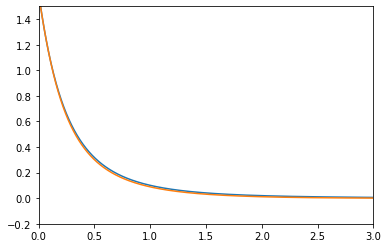

In [7]:
fname = 'ff_kelly.dat'
data = np.loadtxt(fname, unpack=True, skiprows=0)
nQ2 = len(data[0,:])
Q2 =  np.zeros(nQ2)
ges = np.zeros(nQ2)
gms = np.zeros(nQ2)
gev = np.zeros(nQ2)
gmv = np.zeros(nQ2)
ga = np.zeros(nQ2)
Q2 = data[0,:]
print(Q2/10**6)
ges = data[1,:]
gms = data[2,:]
gev = data[3,:]
gmv = data[4,:]
ga = data[5,:]
#plt.plot(Q2/10**6,gev**2, color='blue')
plt.plot(Q2/10**6,ga**2 )
#plt.plot(Q2/10**6,gmv**2, color='red' )
#plt.yscale('log')

# plotting my axial form factor
plt.plot(Q2/10**6, gv.mean(FAzq(Q2/10**6, coeffs))**2)

# plotting the fractional difference
#plt.plot(Q2/10**6, (-gv.mean(FAzq(Q2/10**6, coeffs))**2 + ga**2)/ga**2)

plt.xlim(0.0, 3.0)
plt.ylim(-0.2, 1.5)
plt.show()

In [8]:
from scipy import interpolate
ges_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ges)
gms_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, gms)
gev_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, gev)
gmv_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, gmv)
ga_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga)

In [9]:
# creating interpolates from the axial form factors that i defined

# testing a different mA2
new_mA2 = 1.0
ga_new_dipq = gv.mean(FAdipq(Q2/10**6, new_mA2))

# the ga in the interpolate is a list of numbers, so i need to create a list of numbers for my z-exp and my dipole
ga_zq = gv.mean(FAzq(Q2/10**6, coeffs))
#ga_zq_sdev = gv.sdev(FAzq(Q2/10**6, coeffs))
ga_zq_max = gv.mean(FAzq(Q2/10**6, coeffs))+gv.sdev(FAzq(Q2/10**6, coeffs))
ga_zq_min = gv.mean(FAzq(Q2/10**6, coeffs))-gv.sdev(FAzq(Q2/10**6, coeffs))
ga_dipq = gv.mean(FAdipq(Q2/10**6, mA2))

# and doing the interpolations
#ga_zq_interpolate_sdev = interpolate.InterpolatedUnivariateSpline(Q2, ga_zq_sdev)
ga_zq_interpolate_max = interpolate.InterpolatedUnivariateSpline(Q2, ga_zq_max)
ga_zq_interpolate_min = interpolate.InterpolatedUnivariateSpline(Q2, ga_zq_min)


ga_zq_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga_zq)
ga_dipq_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga_dipq)
ga_dipq_new_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga_new_dipq)

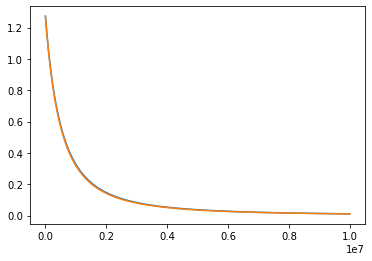

In [10]:
#GAj_dip = ga_dipq_interpolate(Q2j)
GAj_dip = gv.mean(FAdipq(Q2/10**6, mA2))
#GAj_zexp = ga_zq_interpolate(Q2j)
GAj_zexp = gv.mean(FAzq(Q2/10**6, coeffs))
#GAj_dipq_new = ga_dipq_new_interpolate(Q2j)
GAj_dipq_new = gv.mean(FAdipq(Q2/10**6, new_mA2))

plt.plot(Q2, GAj_dip)
plt.plot(Q2, GAj_dipq_new)
plt.show()

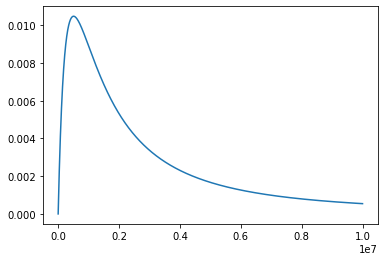

In [11]:
plt.plot(Q2, np.abs(GAj_dip - GAj_dipq_new))
#plt.yscale('log')
plt.show()

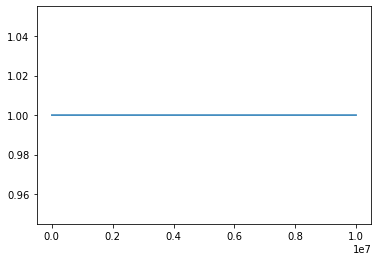

In [12]:
#plt.plot(Q2, ga)
#plt.plot(Q2, ga_zq)
#plt.plot(Q2, ga_zq_min)
#plt.plot(Q2, ga_zq_max)
#plt.plot(Q2, ga_dipq)
#plt.plot(Q2, ga_dipq_interpolate(Q2))
plt.plot(Q2, ga_new_dipq/ga_dipq_new_interpolate(Q2))
#plt.plot(Q2, )
#plt.plot(Q2, ga_new_dipq)
#plt.yscale('log')
plt.show()

In [13]:
wqe = np.sqrt(qR**2+mn**2)-mn
Q2qe = qR**2 - wqe**2
tauqe = Q2qe/4/mn**2

In [14]:
# creating the arrays for the response functions for the z-expansion
R00_cc_1b_zexp = np.zeros((nwR, nq, 3))
R0z_cc_1b_zexp = np.zeros((nwR, nq, 3))
Rzz_cc_1b_zexp = np.zeros((nwR, nq, 3))
Rxx_cc_1b_zexp = np.zeros((nwR, nq, 3))
R00_cc_12b_zexp = np.zeros((nwR, nq, 3))
R0z_cc_12b_zexp = np.zeros((nwR, nq, 3))
Rzz_cc_12b_zexp = np.zeros((nwR, nq, 3))
Rxx_cc_12b_zexp = np.zeros((nwR, nq, 3))
Rxy_cc_1b_zexp = np.zeros((nwR, nq, 3))
Rxy_cc_12b_zexp = np.zeros((nwR, nq, 3))

In [15]:
# creating the arrays for the minimums of the response functions for the z-expansion
R00_cc_1b_zexp_min = np.zeros((nwR, nq, 3))
R0z_cc_1b_zexp_min = np.zeros((nwR, nq, 3))
Rzz_cc_1b_zexp_min = np.zeros((nwR, nq, 3))
Rxx_cc_1b_zexp_min = np.zeros((nwR, nq, 3))
R00_cc_12b_zexp_min = np.zeros((nwR, nq, 3))
R0z_cc_12b_zexp_min = np.zeros((nwR, nq, 3))
Rzz_cc_12b_zexp_min = np.zeros((nwR, nq, 3))
Rxx_cc_12b_zexp_min = np.zeros((nwR, nq, 3))
Rxy_cc_1b_zexp_min = np.zeros((nwR, nq, 3))
Rxy_cc_12b_zexp_min = np.zeros((nwR, nq, 3))

# creating the arrays for the maximums of the response functions for the z-expansion
R00_cc_1b_zexp_max = np.zeros((nwR, nq, 3))
R0z_cc_1b_zexp_max = np.zeros((nwR, nq, 3))
Rzz_cc_1b_zexp_max = np.zeros((nwR, nq, 3))
Rxx_cc_1b_zexp_max = np.zeros((nwR, nq, 3))
R00_cc_12b_zexp_max = np.zeros((nwR, nq, 3))
R0z_cc_12b_zexp_max = np.zeros((nwR, nq, 3))
Rzz_cc_12b_zexp_max = np.zeros((nwR, nq, 3))
Rxx_cc_12b_zexp_max = np.zeros((nwR, nq, 3))
Rxy_cc_1b_zexp_max = np.zeros((nwR, nq, 3))
Rxy_cc_12b_zexp_max = np.zeros((nwR, nq, 3))

In [16]:
# creating the arrays for the response functions for the new mA value
R00_cc_1b_dipq_new = np.zeros((nwR, nq, 3))
R0z_cc_1b_dipq_new = np.zeros((nwR, nq, 3))
Rzz_cc_1b_dipq_new = np.zeros((nwR, nq, 3))
Rxx_cc_1b_dipq_new = np.zeros((nwR, nq, 3))
R00_cc_12b_dipq_new = np.zeros((nwR, nq, 3))
R0z_cc_12b_dipq_new = np.zeros((nwR, nq, 3))
Rzz_cc_12b_dipq_new = np.zeros((nwR, nq, 3))
Rxx_cc_12b_dipq_new = np.zeros((nwR, nq, 3))
Rxy_cc_1b_dipq_new = np.zeros((nwR, nq, 3))
Rxy_cc_12b_dipq_new = np.zeros((nwR, nq, 3))

In [17]:
for i in range (nq):
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    #print('Q2qe: '+str(Q2qe))
    Gev_qe = gev_interpolate(Q2qe)
    Gmv_qe = gmv_interpolate(Q2qe)
    GA_qe = ga_interpolate(Q2qe)
    #print('Gev_qe: '+str(Gev_qe))
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        Gmvj = gmv_interpolate(Q2j)
        # defining both the dipole and the z-expansion versions
        
        #GAj_dip = ga_dipq_interpolate(Q2j)
        #GAj_dipq_new = ga_dipq_new_interpolate(Q2j)
        #GAj_zexp = ga_zq_interpolate(Q2j)
        GAj_dip = gv.mean(FAdipq(Q2j/10**6, mA2))
        GAj_dipq_new = gv.mean(FAdipq(Q2j/10**6, new_mA2))
        GAj_zexp = gv.mean(FAzq(Q2j/10**6, coeffs))
        
        #GAj_zexp_min = ga_zq_interpolate_min(Q2j)
        #GAj_zexp_max = ga_zq_interpolate_max(Q2j)
        GAj_zexp_min = gv.mean(FAzq(Q2j/10**6, coeffs))-gv.sdev(FAzq(Q2j/10**6, coeffs))
        GAj_zexp_max = gv.mean(FAzq(Q2j/10**6, coeffs))+gv.sdev(FAzq(Q2j/10**6, coeffs))
        #if j == 5:
        #    print('Gs')
        #    print(qR[i])
        #    print(GAj_dip)
        #    print(GAj_zexp)
        
        f_V=Gevj**2/Gev_qe**2
        f_VM=Gmvj**2/Gmv_qe**2
        # defining both the dipole and the z-expansion versions
        f_A_dip = GAj_dip**2/GA_qe**2
        f_A_dipq_new = GAj_dipq_new**2/GA_qe**2
        f_A_zexp = GAj_zexp**2/GA_qe**2
        f_A_zexp_min = GAj_zexp_min**2/GA_qe**2
        f_A_zexp_max = GAj_zexp_max**2/GA_qe**2
        #if j == 5:
        #    print('fs')
        #    #print(Q2j)
        #    print(f_A_dip)
        #    print(f_A_zexp)
        
        # next definining all the z-expansion response functions
        R00_cc_1b_zexp[j,i,:]=R00_vec_1b[j,i,:]*f_V+R00_ax_1b[j,i,:]*f_A_zexp
        Rxx_cc_1b_zexp[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM+Rxx_ax_1b[j,i,:]*f_A_zexp
        Rzz_cc_1b_zexp[j,i,:]=Rzz_vec_1b[j,i,:]*f_V+Rzz_ax_1b[j,i,:]*f_A_zexp
        R0z_cc_1b_zexp[j,i,:]=R0z_vec_1b[j,i,:]*f_V+R0z_ax_1b[j,i,:]*f_A_zexp
        Rxy_cc_1b_zexp[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_A_zexp)*np.sqrt(f_VM)
        #
        R00_cc_12b_zexp[j,i,:]=R00_vec_12b[j,i,:]*f_V+R00_ax_12b[j,i,:]*f_A_zexp
        Rxx_cc_12b_zexp[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM+Rxx_ax_12b[j,i,:]*f_A_zexp
        Rzz_cc_12b_zexp[j,i,:]=Rzz_vec_12b[j,i,:]*f_V+Rzz_ax_12b[j,i,:]*f_A_zexp
        R0z_cc_12b_zexp[j,i,:]=R0z_vec_12b[j,i,:]*f_V+R0z_ax_12b[j,i,:]*f_A_zexp
        Rxy_cc_12b_zexp[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_A_zexp)*np.sqrt(f_VM)
        
        # next definining all the minimums of the z-expansion response functions
        R00_cc_1b_zexp_min[j,i,:]=R00_vec_1b[j,i,:]*f_V+R00_ax_1b[j,i,:]*f_A_zexp_min
        Rxx_cc_1b_zexp_min[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM+Rxx_ax_1b[j,i,:]*f_A_zexp_min
        Rzz_cc_1b_zexp_min[j,i,:]=Rzz_vec_1b[j,i,:]*f_V+Rzz_ax_1b[j,i,:]*f_A_zexp_min
        R0z_cc_1b_zexp_min[j,i,:]=R0z_vec_1b[j,i,:]*f_V+R0z_ax_1b[j,i,:]*f_A_zexp_min
        Rxy_cc_1b_zexp_min[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_A_zexp_min)*np.sqrt(f_VM)
        #
        R00_cc_12b_zexp_min[j,i,:]=R00_vec_12b[j,i,:]*f_V+R00_ax_12b[j,i,:]*f_A_zexp_min
        Rxx_cc_12b_zexp_min[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM+Rxx_ax_12b[j,i,:]*f_A_zexp_min
        Rzz_cc_12b_zexp_min[j,i,:]=Rzz_vec_12b[j,i,:]*f_V+Rzz_ax_12b[j,i,:]*f_A_zexp_min
        R0z_cc_12b_zexp_min[j,i,:]=R0z_vec_12b[j,i,:]*f_V+R0z_ax_12b[j,i,:]*f_A_zexp_min
        Rxy_cc_12b_zexp_min[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_A_zexp_min)*np.sqrt(f_VM)
        
        # next definining all the maximums of the z-expansion response functions
        R00_cc_1b_zexp_max[j,i,:]=R00_vec_1b[j,i,:]*f_V+R00_ax_1b[j,i,:]*f_A_zexp_max
        Rxx_cc_1b_zexp_max[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM+Rxx_ax_1b[j,i,:]*f_A_zexp_max
        Rzz_cc_1b_zexp_max[j,i,:]=Rzz_vec_1b[j,i,:]*f_V+Rzz_ax_1b[j,i,:]*f_A_zexp_max
        R0z_cc_1b_zexp_max[j,i,:]=R0z_vec_1b[j,i,:]*f_V+R0z_ax_1b[j,i,:]*f_A_zexp_max
        Rxy_cc_1b_zexp_max[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_A_zexp_max)*np.sqrt(f_VM)
        #
        R00_cc_12b_zexp_max[j,i,:]=R00_vec_12b[j,i,:]*f_V+R00_ax_12b[j,i,:]*f_A_zexp_max
        Rxx_cc_12b_zexp_max[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM+Rxx_ax_12b[j,i,:]*f_A_zexp_max
        Rzz_cc_12b_zexp_max[j,i,:]=Rzz_vec_12b[j,i,:]*f_V+Rzz_ax_12b[j,i,:]*f_A_zexp_max
        R0z_cc_12b_zexp_max[j,i,:]=R0z_vec_12b[j,i,:]*f_V+R0z_ax_12b[j,i,:]*f_A_zexp_max
        Rxy_cc_12b_zexp_max[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_A_zexp_max)*np.sqrt(f_VM)
        
        # next definining all the response functions for the new mA value
        R00_cc_1b_dipq_new[j,i,:]=R00_vec_1b[j,i,:]*f_V+R00_ax_1b[j,i,:]*f_A_dipq_new
        Rxx_cc_1b_dipq_new[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM+Rxx_ax_1b[j,i,:]*f_A_dipq_new
        Rzz_cc_1b_dipq_new[j,i,:]=Rzz_vec_1b[j,i,:]*f_V+Rzz_ax_1b[j,i,:]*f_A_dipq_new
        R0z_cc_1b_dipq_new[j,i,:]=R0z_vec_1b[j,i,:]*f_V+R0z_ax_1b[j,i,:]*f_A_dipq_new
        Rxy_cc_1b_dipq_new[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_A_dipq_new)*np.sqrt(f_VM)
        #
        R00_cc_12b_dipq_new[j,i,:]=R00_vec_12b[j,i,:]*f_V+R00_ax_12b[j,i,:]*f_A_dipq_new
        Rxx_cc_12b_dipq_new[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM+Rxx_ax_12b[j,i,:]*f_A_dipq_new
        Rzz_cc_12b_dipq_new[j,i,:]=Rzz_vec_12b[j,i,:]*f_V+Rzz_ax_12b[j,i,:]*f_A_dipq_new
        R0z_cc_12b_dipq_new[j,i,:]=R0z_vec_12b[j,i,:]*f_V+R0z_ax_12b[j,i,:]*f_A_dipq_new
        Rxy_cc_12b_dipq_new[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_A_dipq_new)*np.sqrt(f_VM)
        
        # defining all the dipole response functions
        #print(R00_vec_1b[j,i,:]*f_V)
        R00_cc_1b_dip[j,i,:]=R00_vec_1b[j,i,:]*f_V+R00_ax_1b[j,i,:]*f_A_dip
        Rxx_cc_1b_dip[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM+Rxx_ax_1b[j,i,:]*f_A_dip
        Rzz_cc_1b_dip[j,i,:]=Rzz_vec_1b[j,i,:]*f_V+Rzz_ax_1b[j,i,:]*f_A_dip
        R0z_cc_1b_dip[j,i,:]=R0z_vec_1b[j,i,:]*f_V+R0z_ax_1b[j,i,:]*f_A_dip
        Rxy_cc_1b_dip[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_A_dip)*np.sqrt(f_VM)
        #
        R00_cc_12b_dip[j,i,:]=R00_vec_12b[j,i,:]*f_V+R00_ax_12b[j,i,:]*f_A_dip
        Rxx_cc_12b_dip[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM+Rxx_ax_12b[j,i,:]*f_A_dip
        Rzz_cc_12b_dip[j,i,:]=Rzz_vec_12b[j,i,:]*f_V+Rzz_ax_12b[j,i,:]*f_A_dip
        R0z_cc_12b_dip[j,i,:]=R0z_vec_12b[j,i,:]*f_V+R0z_ax_12b[j,i,:]*f_A_dip
        Rxy_cc_12b_dip[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_A_dip)*np.sqrt(f_VM)

In [18]:
# redefining R00_cc_1b_zexp so that is has the mean from R00_cc_1b_zexp (R00_cc_1b_zexp[2]), 
# the minimum from R00_cc_1b_zexp_min (R00_cc_1b_zexp_min[0]), 
# and the maximum from R00_cc_1b_zexp_max (R00_cc_1b_zexp_max[1])
irange = len(R00_cc_1b_zexp)
jrange = len(R00_cc_1b_zexp[0])
krange = len(R00_cc_1b_zexp[0][0])

for i in range(irange):
    #print(i)
    for j in range(jrange):
        # 00 1b
        R00_cc_1b_zexp[i][j][0] = R00_cc_1b_zexp[i][j][2] - np.sqrt((R00_cc_1b_zexp_min[i][j][2] - R00_cc_1b_zexp[i][j][2])**2 
                                         + (R00_cc_1b_zexp[i][j][0] - R00_cc_1b_zexp[i][j][2])**2)
        R00_cc_1b_zexp[i][j][1] = R00_cc_1b_zexp[i][j][2] + np.sqrt((R00_cc_1b_zexp_max[i][j][2] - R00_cc_1b_zexp[i][j][2])**2
                                          + (R00_cc_1b_zexp[i][j][1] - R00_cc_1b_zexp[i][j][2])**2)
        R00_cc_1b_zexp[i][j][2] = R00_cc_1b_zexp[i][j][2]
        # 00 12b
        R00_cc_12b_zexp[i][j][0] = R00_cc_12b_zexp[i][j][2] - np.sqrt((R00_cc_12b_zexp_min[i][j][2] - R00_cc_12b_zexp[i][j][2])**2 
                                         + (R00_cc_12b_zexp[i][j][0] - R00_cc_12b_zexp[i][j][2])**2)
        R00_cc_12b_zexp[i][j][1] = R00_cc_12b_zexp[i][j][2] + np.sqrt((R00_cc_12b_zexp_max[i][j][2] - R00_cc_12b_zexp[i][j][2])**2
                                          + (R00_cc_12b_zexp[i][j][1] - R00_cc_12b_zexp[i][j][2])**2)
        R00_cc_12b_zexp[i][j][2] = R00_cc_12b_zexp[i][j][2]
        # 0z 1b
        R0z_cc_1b_zexp[i][j][0] = R0z_cc_1b_zexp[i][j][2] - np.sqrt((R0z_cc_1b_zexp_min[i][j][2] - R0z_cc_1b_zexp[i][j][2])**2 
                                         + (R0z_cc_1b_zexp[i][j][0] - R0z_cc_1b_zexp[i][j][2])**2)
        R0z_cc_1b_zexp[i][j][1] = R0z_cc_1b_zexp[i][j][2] + np.sqrt((R0z_cc_1b_zexp_max[i][j][2] - R0z_cc_1b_zexp[i][j][2])**2
                                          + (R0z_cc_1b_zexp[i][j][1] - R0z_cc_1b_zexp[i][j][2])**2)
        R0z_cc_1b_zexp[i][j][2] = R0z_cc_1b_zexp[i][j][2]
        # 0z 12b
        R0z_cc_12b_zexp[i][j][0] = R0z_cc_12b_zexp[i][j][2] - np.sqrt((R0z_cc_12b_zexp_min[i][j][2] - R0z_cc_12b_zexp[i][j][2])**2 
                                         + (R0z_cc_12b_zexp[i][j][0] - R0z_cc_12b_zexp[i][j][2])**2)
        R0z_cc_12b_zexp[i][j][1] = R0z_cc_12b_zexp[i][j][2] + np.sqrt((R0z_cc_12b_zexp_max[i][j][2] - R0z_cc_12b_zexp[i][j][2])**2
                                          + (R0z_cc_12b_zexp[i][j][1] - R0z_cc_12b_zexp[i][j][2])**2)
        R0z_cc_12b_zexp[i][j][2] = R0z_cc_12b_zexp[i][j][2]
        # zz 1b
        Rzz_cc_1b_zexp[i][j][0] = Rzz_cc_1b_zexp[i][j][2] - np.sqrt((Rzz_cc_1b_zexp_min[i][j][2] - Rzz_cc_1b_zexp[i][j][2])**2 
                                         + (Rzz_cc_1b_zexp[i][j][0] - Rzz_cc_1b_zexp[i][j][2])**2)
        Rzz_cc_1b_zexp[i][j][1] = Rzz_cc_1b_zexp[i][j][2] + np.sqrt((Rzz_cc_1b_zexp_max[i][j][2] - Rzz_cc_1b_zexp[i][j][2])**2
                                          + (Rzz_cc_1b_zexp[i][j][1] - Rzz_cc_1b_zexp[i][j][2])**2)
        Rzz_cc_1b_zexp[i][j][2] = Rzz_cc_1b_zexp[i][j][2]
        # zz 12b
        Rzz_cc_12b_zexp[i][j][0] = Rzz_cc_12b_zexp[i][j][2] - np.sqrt((Rzz_cc_12b_zexp_min[i][j][2] - Rzz_cc_12b_zexp[i][j][2])**2 
                                         + (Rzz_cc_12b_zexp[i][j][0] - Rzz_cc_12b_zexp[i][j][2])**2)
        Rzz_cc_12b_zexp[i][j][1] = Rzz_cc_12b_zexp[i][j][2] + np.sqrt((Rzz_cc_12b_zexp_max[i][j][2] - Rzz_cc_12b_zexp[i][j][2])**2
                                          + (Rzz_cc_12b_zexp[i][j][1] - Rzz_cc_12b_zexp[i][j][2])**2)
        Rzz_cc_12b_zexp[i][j][2] = Rzz_cc_12b_zexp[i][j][2]
        # xx 1b
        Rxx_cc_1b_zexp[i][j][0] = Rxx_cc_1b_zexp[i][j][2] - np.sqrt((Rxx_cc_1b_zexp_min[i][j][2] - Rxx_cc_1b_zexp[i][j][2])**2 
                                         + (Rxx_cc_1b_zexp[i][j][0] - Rxx_cc_1b_zexp[i][j][2])**2)
        Rxx_cc_1b_zexp[i][j][1] = Rxx_cc_1b_zexp[i][j][2] + np.sqrt((Rxx_cc_1b_zexp_max[i][j][2] - Rxx_cc_1b_zexp[i][j][2])**2
                                          + (Rxx_cc_1b_zexp[i][j][1] - Rxx_cc_1b_zexp[i][j][2])**2)
        Rxx_cc_1b_zexp[i][j][2] = Rxx_cc_1b_zexp[i][j][2]
        # xx 12b
        Rxx_cc_12b_zexp[i][j][0] = Rxx_cc_12b_zexp[i][j][2] - np.sqrt((Rxx_cc_12b_zexp_min[i][j][2] - Rxx_cc_12b_zexp[i][j][2])**2 
                                         + (Rxx_cc_12b_zexp[i][j][0] - Rxx_cc_12b_zexp[i][j][2])**2)
        Rxx_cc_12b_zexp[i][j][1] = Rxx_cc_12b_zexp[i][j][2] + np.sqrt((Rxx_cc_12b_zexp_max[i][j][2] - Rxx_cc_12b_zexp[i][j][2])**2
                                          + (Rxx_cc_12b_zexp[i][j][1] - Rxx_cc_12b_zexp[i][j][2])**2)
        Rxx_cc_12b_zexp[i][j][2] = Rxx_cc_12b_zexp[i][j][2]
        # xy 1b
        Rxy_cc_1b_zexp[i][j][0] = Rxy_cc_1b_zexp[i][j][2] - np.sqrt((Rxy_cc_1b_zexp_min[i][j][2] - Rxy_cc_1b_zexp[i][j][2])**2 
                                         + (Rxy_cc_1b_zexp[i][j][0] - Rxy_cc_1b_zexp[i][j][2])**2)
        Rxy_cc_1b_zexp[i][j][1] = Rxy_cc_1b_zexp[i][j][2] + np.sqrt((Rxy_cc_1b_zexp_max[i][j][2] - Rxy_cc_1b_zexp[i][j][2])**2
                                          + (Rxy_cc_1b_zexp[i][j][1] - Rxy_cc_1b_zexp[i][j][2])**2)
        Rxy_cc_1b_zexp[i][j][2] = Rxy_cc_1b_zexp[i][j][2]
        # xy 12b
        Rxy_cc_12b_zexp[i][j][0] = Rxy_cc_12b_zexp[i][j][2] - np.sqrt((Rxy_cc_12b_zexp_min[i][j][2] - Rxy_cc_12b_zexp[i][j][2])**2 
                                         + (Rxy_cc_12b_zexp[i][j][0] - Rxy_cc_12b_zexp[i][j][2])**2)
        Rxy_cc_12b_zexp[i][j][1] = Rxy_cc_12b_zexp[i][j][2] + np.sqrt((Rxy_cc_12b_zexp_max[i][j][2] - Rxy_cc_12b_zexp[i][j][2])**2
                                          + (Rxy_cc_12b_zexp[i][j][1] - Rxy_cc_12b_zexp[i][j][2])**2)
        Rxy_cc_12b_zexp[i][j][2] = Rxy_cc_12b_zexp[i][j][2]

#print(R00_cc_1b_zexp)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


700


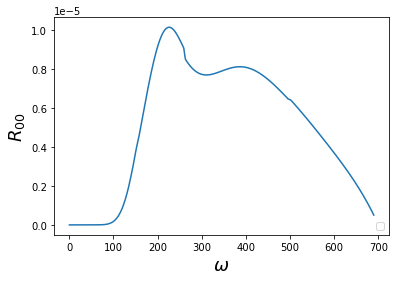

In [19]:
# choosing which value of q2 i want from qR
q2index = 6
print(qR[q2index])

# choosing which w range i want to look at
omegarange = qR[q2index] - 10
# the discontinuity always occurs 10 less than qR[q2index] regardless of q2index
#print(omegarange)

# 00 case

# defining the range (the range is omega(q^2) where q = qR[q2index])
therange = omegarange

#plt.plot(wR[:therange], R00_cc_1b_zexp[:,q2index,0][:therange], color='green', label='z-exp')
#plt.plot(wR[:therange], R00_cc_1b_dip[:,q2index,0][:therange], color='blue', label='mA=1.014')
#plt.plot(wR[:therange], R00_cc_1b_dipq_new[:,q2index,0][:therange], color='orange', label='mA=1.0')
plt.plot(wR[:therange], np.abs(R00_cc_1b_dipq_new[:,q2index,0][:therange] - R00_cc_1b_dip[:,q2index,0][:therange]))

plt.ylabel(r'$R_{00}$', size=18)
plt.legend(loc=4)
plt.xlabel(r'$\omega$', size=18)
#plt.savefig('R00_q=700', bbox_inches='tight')
#plt.savefig('R00_q=100', bbox_inches='tight')
plt.show()

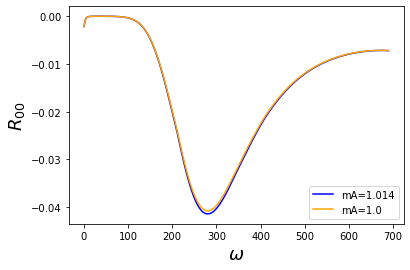

In [20]:
#plt.plot(wR[:therange], Rxy_cc_1b_zexp[:,q2index,0][:therange], color='green', label='z-exp')
plt.plot(wR[:therange], Rxy_cc_1b_dip[:,q2index,0][:therange], color='blue', label='mA=1.014')
plt.plot(wR[:therange], Rxy_cc_1b_dipq_new[:,q2index,0][:therange], color='orange', label='mA=1.0')
#plt.plot(wR[:therange], np.abs(Rxy_cc_1b_dipq_new[:,q2index,0][:therange] - Rxy_cc_1b_dip[:,q2index,0][:therange]))

plt.ylabel(r'$R_{00}$', size=18)
plt.legend(loc=4)
plt.xlabel(r'$\omega$', size=18)
#plt.savefig('Rxy_q=700', bbox_inches='tight')
#plt.savefig('Rxy_q=100', bbox_inches='tight')
plt.show()

In [21]:
#1/0

In [22]:
# Read one-body responses
R00_ct_1b_dip=np.zeros( (nwR, nq, 3) )
R0z_ct_1b_dip=np.zeros( (nwR, nq, 3) )
Rzz_ct_1b_dip=np.zeros( (nwR, nq, 3) )
Rxx_ct_1b_dip=np.zeros( (nwR, nq, 3) )
R00_ct_12b_dip=np.zeros( (nwR, nq, 3) )
R0z_ct_12b_dip=np.zeros( (nwR, nq, 3) )
Rzz_ct_12b_dip=np.zeros( (nwR, nq, 3) )
Rxx_ct_12b_dip=np.zeros( (nwR, nq, 3) )
Rxy_ct_1b_dip=np.zeros( (nwR, nq, 3) )
Rxy_ct_12b_dip=np.zeros( (nwR, nq, 3) )
qname = ['q_100/', 'q_200/', 'q_300/', 'q_400/', 'q_500/','q_600/', 'q_700/']
fname_cc_00_1b = []
fname_cc_0z_1b = []
fname_cc_zz_1b = []
fname_cc_xx_1b = []
fname_cc_xy_1b = []
fname_cc_00_12b = []
fname_cc_0z_12b = []
fname_cc_zz_12b = []
fname_cc_xx_12b = []
fname_cc_xy_12b = []
#ff = '_hohler/'
ff = '_kelly/'
for i in range (0,7):
    fname_cc_00_1b.append('nofix'+ ff + qname [i] + 'cc_rr_1b.out') 
    fname_cc_0z_1b.append('nofix'+ ff + qname [i] + 'cc_0z_1b.out') 
    fname_cc_zz_1b.append('nofix'+ ff + qname [i] + 'cc_zz_1b.out') 
    fname_cc_xx_1b.append('nofix'+ ff + qname [i] + 'cc_xx_1b.out') 
    fname_cc_xy_1b.append('nofix'+ ff + qname [i] + 'cc_xy_1b.out') 
    fname_cc_00_12b.append('nofix'+ ff + qname [i] + 'cc_rr_12b.out') 
    fname_cc_0z_12b.append('nofix'+ ff + qname [i] + 'cc_0z_12b.out') 
    fname_cc_zz_12b.append('nofix'+ ff + qname [i] + 'cc_zz_12b.out') 
    fname_cc_xx_12b.append('nofix'+ ff + qname [i] + 'cc_xx_12b.out') 
    fname_cc_xy_12b.append('nofix'+ ff + qname [i] + 'cc_xy_12b.out') 
for i in range (0,7):
    data_cc_00_1b = np.loadtxt(fname_cc_00_1b[i], unpack=True, skiprows=1)
    data_cc_0z_1b = np.loadtxt(fname_cc_0z_1b[i], unpack=True, skiprows=1)
    data_cc_zz_1b = np.loadtxt(fname_cc_zz_1b[i], unpack=True, skiprows=1)
    data_cc_xx_1b = np.loadtxt(fname_cc_xx_1b[i], unpack=True, skiprows=1) 
    data_cc_xy_1b = np.loadtxt(fname_cc_xy_1b[i], unpack=True, skiprows=1)    
    data_cc_00_12b = np.loadtxt(fname_cc_00_12b[i], unpack=True, skiprows=1)
    data_cc_0z_12b = np.loadtxt(fname_cc_0z_12b[i], unpack=True, skiprows=1)
    data_cc_zz_12b = np.loadtxt(fname_cc_zz_12b[i], unpack=True, skiprows=1)
    data_cc_xx_12b = np.loadtxt(fname_cc_xx_12b[i], unpack=True, skiprows=1)  
    data_cc_xy_12b = np.loadtxt(fname_cc_xy_12b[i], unpack=True, skiprows=1)   
    wR[:]=data_cc_00_1b[0,:]
    for j in range (3):
        R00_ct_1b_dip[:,i,j]=data_cc_00_1b[j+1,:]
        R0z_ct_1b_dip[:,i,j]=data_cc_0z_1b[j+1,:]
        Rzz_ct_1b_dip[:,i,j]=data_cc_zz_1b[j+1,:]
        Rxx_ct_1b_dip[:,i,j]=data_cc_xx_1b[j+1,:]
        Rxy_ct_1b_dip[:,i,j]=data_cc_xy_1b[j+1,:]               
        R00_ct_12b_dip[:,i,j]=data_cc_00_12b[j+1,:]
        R0z_ct_12b_dip[:,i,j]=data_cc_0z_12b[j+1,:]
        Rzz_ct_12b_dip[:,i,j]=data_cc_zz_12b[j+1,:]
        Rxx_ct_12b_dip[:,i,j]=data_cc_xx_12b[j+1,:]  
        Rxy_ct_12b_dip[:,i,j]=data_cc_xy_12b[j+1,:]       

In [23]:
#1/0

## $R_{00}$ - one body

In [24]:
eps=50.
mn=939.
mpi=139.
kF=260.
mstar=1.0
y=np.zeros((nwR,nq))
for i in range (nwR):
    for j in range (nq):
        y[i,j]=mn/qR[j]/kF*(wR[i]-qR[j]**2/2/(mn*mstar)-eps)
G00_vc = np.zeros((nq,nwR))
G00_ac = np.zeros((nq,nwR))

# making the G00_cc arrays for the first dipole case
G00_cc_dip = np.zeros((nq,nwR))
G00_cc_min_dip = np.zeros(nq)

# making the G00_cc arrays for the z-expansion case
G00_cc_zexp = np.zeros((nq,nwR))
G00_cc_min_zexp = np.zeros(nq)

# making the G00_cc arrays for the new dipole case
G00_cc_dipq_new = np.zeros((nq,nwR))
G00_cc_min_dipq_new = np.zeros(nq)


for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        
        #GAj_dip = ga_dipq_interpolate(Q2j)
        GAj_dip = gv.mean(FAdipq(Q2j/10**6, mA2))
        #GAj_zexp = ga_zq_interpolate(Q2j)
        GAj_zexp = gv.mean(FAzq(Q2j/10**6, coeffs))
        #GAj_dipq_new = ga_dipq_new_interpolate(Q2j)
        GAj_dipq_new = gv.mean(FAdipq(Q2j/10**6, new_mA2))
        
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        G00_vc[i,j] = (((Gen-Gep-2*Gmn+2*Gmp)**2*(kF-pG)*(kF+pG)*qR[i]**2)/(32*mn**4)+(Gen-Gep)**2/(1+tauqe[i]))/qR[i]
        G00_ac[i,j] = ((GA**2*(2*(kF**2+pG**2)+4*pG*qR[i]+qR[i]**2))/(4*mn**2)-(GA*gps*qR[i]*(2*pG+qR[i])*wqe[i])/mn + gps**2*qR[i]**2*wqe[i]**2)/qR[i]
        
        G00_cc_dip[i,j] = G00_vc[i,j]*Gevj**2/Gev**2 + G00_ac[i,j]*GAj_dip**2/GA**2 
        G00_cc_zexp[i,j] = G00_vc[i,j]*Gevj**2/Gev**2 + G00_ac[i,j]*GAj_zexp**2/GA**2
        G00_cc_dipq_new[i,j] = G00_vc[i,j]*Gevj**2/Gev**2 + G00_ac[i,j]*GAj_dipq_new**2/GA**2
        
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G00_cc_min_dip[i] = G00_cc_dip[i,j] 
            G00_cc_min_zexp[i] = G00_cc_zexp[i,j] 
            G00_cc_min_dipq_new[i] = G00_cc_dipq_new[i,j] 
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            G00_cc_dip[i,j] = G00_cc_min_dip[i]
            G00_cc_zexp[i,j] = G00_cc_min_zexp[i]
            G00_cc_dipq_new[i,j] = G00_cc_min_dipq_new[i]
        G00_cc_dip[i,j] = G00_cc_dip[i,j] / kF * ( mn * 6 ) 
        G00_cc_zexp[i,j] = G00_cc_zexp[i,j] / kF * ( mn * 6 ) 
        G00_cc_dipq_new[i,j] = G00_cc_dipq_new[i,j] / kF * ( mn * 6 ) 

In [25]:
R00_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_1b_dip[:,6,2]/G00_cc_dip[6,:])
R00_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_1b_dip[:,5,2]/G00_cc_dip[5,:])

R00_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_1b_zexp[:,6,2]/G00_cc_zexp[6,:])
R00_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_1b_zexp[:,5,2]/G00_cc_zexp[5,:])

R00_cc_1b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_1b_dipq_new[:,6,2]/G00_cc_dipq_new[6,:])
R00_cc_1b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_1b_dipq_new[:,5,2]/G00_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R00_cc_1b_dip[i,j,0] = R00_cc_1b_interpolate_600_dip(y[i,j])*G00_cc_dip[j,i]
        R00_cc_1b_dip[i,j,2] = R00_cc_1b_interpolate_700_dip(y[i,j])*G00_cc_dip[j,i]
        err_dip =  2 * (R00_cc_1b_dip[i,j,2] - R00_cc_1b_dip[i,j,0])
        R00_cc_1b_dip[i,j,1] = R00_cc_1b_dip[i,j,2] + err_dip
        R00_cc_1b_dip[i,j,0] = R00_cc_1b_dip[i,j,2] - err_dip
        
        R00_cc_1b_zexp[i,j,0] = R00_cc_1b_interpolate_600_zexp(y[i,j])*G00_cc_zexp[j,i]
        R00_cc_1b_zexp[i,j,2] = R00_cc_1b_interpolate_700_zexp(y[i,j])*G00_cc_zexp[j,i]
        err_zexp =  2 * (R00_cc_1b_zexp[i,j,2] - R00_cc_1b_zexp[i,j,0])
        R00_cc_1b_zexp[i,j,1] = R00_cc_1b_zexp[i,j,2] + err_zexp
        R00_cc_1b_zexp[i,j,0] = R00_cc_1b_zexp[i,j,2] - err_zexp
        
        R00_cc_1b_dipq_new[i,j,0] = R00_cc_1b_interpolate_600_dipq_new(y[i,j])*G00_cc_dipq_new[j,i]
        R00_cc_1b_dipq_new[i,j,2] = R00_cc_1b_interpolate_700_dipq_new(y[i,j])*G00_cc_dipq_new[j,i]
        err_dipq_new =  2 * (R00_cc_1b_dipq_new[i,j,2] - R00_cc_1b_dipq_new[i,j,0])
        R00_cc_1b_dipq_new[i,j,1] = R00_cc_1b_dipq_new[i,j,2] + err_dipq_new
        R00_cc_1b_dipq_new[i,j,0] = R00_cc_1b_dipq_new[i,j,2] - err_dipq_new
        
        if y[i,j] < y[0,6]:
            R00_cc_1b_dip[i,j,:] = 0
            R00_cc_1b_dipq_new[i,j,:] = 0
            R00_cc_1b_zexp[i,j,:] = 0
        for k in range(3):
            if R00_cc_1b_dip[i,j,k] < 0:  R00_cc_1b_dip[i,j,k] = 0
            if R00_cc_1b_dipq_new[i,j,k] < 0:  R00_cc_1b_dipq_new[i,j,k] = 0
            if R00_cc_1b_zexp[i,j,k] < 0:  R00_cc_1b_zexp[i,j,k] = 0

## $R_{00}$ - one-two body

In [26]:
R00_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_12b_dip[:,6,2]/G00_cc_dip[6,:])
R00_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_12b_dip[:,5,2]/G00_cc_dip[5,:])

R00_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_12b_zexp[:,6,2]/G00_cc_zexp[6,:])
R00_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_12b_zexp[:,5,2]/G00_cc_zexp[5,:])

R00_cc_12b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_12b_dipq_new[:,6,2]/G00_cc_dipq_new[6,:])
R00_cc_12b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_12b_dipq_new[:,5,2]/G00_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R00_cc_12b_dip[i,j,0] = R00_cc_12b_interpolate_600_dip(y[i,j])*G00_cc_dip[j,i]
        R00_cc_12b_dip[i,j,2] = R00_cc_12b_interpolate_700_dip(y[i,j])*G00_cc_dip[j,i]
        err_dip = 2 * (R00_cc_12b_dip[i,j,2] - R00_cc_12b_dip[i,j,0])
        R00_cc_12b_dip[i,j,1] = R00_cc_12b_dip[i,j,2] + err_dip
        R00_cc_12b_dip[i,j,0] = R00_cc_12b_dip[i,j,2] - err_dip
        
        R00_cc_12b_zexp[i,j,0] = R00_cc_12b_interpolate_600_zexp(y[i,j])*G00_cc_zexp[j,i]
        R00_cc_12b_zexp[i,j,2] = R00_cc_12b_interpolate_700_zexp(y[i,j])*G00_cc_zexp[j,i]
        err_zexp = 2 * (R00_cc_12b_zexp[i,j,2] - R00_cc_12b_zexp[i,j,0])
        R00_cc_12b_zexp[i,j,1] = R00_cc_12b_zexp[i,j,2] + err_zexp
        R00_cc_12b_zexp[i,j,0] = R00_cc_12b_zexp[i,j,2] - err_zexp
        
        R00_cc_12b_dipq_new[i,j,0] = R00_cc_12b_interpolate_600_dipq_new(y[i,j])*G00_cc_dipq_new[j,i]
        R00_cc_12b_dipq_new[i,j,2] = R00_cc_12b_interpolate_700_dipq_new(y[i,j])*G00_cc_dipq_new[j,i]
        err_dipq_new = 2 * (R00_cc_12b_dipq_new[i,j,2] - R00_cc_12b_dipq_new[i,j,0])
        R00_cc_12b_dipq_new[i,j,1] = R00_cc_12b_dipq_new[i,j,2] + err_dipq_new
        R00_cc_12b_dipq_new[i,j,0] = R00_cc_12b_dipq_new[i,j,2] - err_dipq_new
        
        if y[i,j] < y[0,6]:
            R00_cc_12b_dip[i,j,:] = 0
            R00_cc_12b_dipq_new[i,j,:] = 0
            R00_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if R00_cc_12b_dip[i,j,k] < 0:  R00_cc_12b_dip[i,j,k] = 0
            if R00_cc_12b_dipq_new[i,j,k] < 0:  R00_cc_12b_dipq_new[i,j,k] = 0
            if R00_cc_12b_zexp[i,j,k] < 0:  R00_cc_12b_zexp[i,j,k] = 0

## $R_{0z}$ - one body

In [27]:
G0z_vc = np.zeros((nq,nwR))
G0z_ac = np.zeros((nq,nwR))

# making the G0z_cc arrays for the first dipole case
G0z_cc_dip = np.zeros((nq,nwR))
G0z_cc_min_dip = np.zeros(nq)

# making the G0z_cc arrays for the z-expansion case
G0z_cc_zexp = np.zeros((nq,nwR))
G0z_cc_min_zexp = np.zeros(nq)

# making the G0z_cc arrays for the new dipole case
G0z_cc_dipq_new = np.zeros((nq,nwR))
G0z_cc_min_dipq_new = np.zeros(nq)

for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2-wj**2)
        Gevj = gev_interpolate(Q2j)
        
        #GAj_dip = ga_dipq_interpolate(Q2j)
        GAj_dip = gv.mean(FAdipq(Q2j/10**6, mA2))
        #GAj_zexp = ga_zq_interpolate(Q2j)
        GAj_zexp = gv.mean(FAzq(Q2j/10**6, coeffs))
        #GAj_dipq_new = ga_dipq_new_interpolate(Q2j)
        GAj_dipq_new = gv.mean(FAdipq(Q2j/10**6, new_mA2))
        
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > 3*kF: pG = 3*kF
        G0z_vc[i,j] = wR[j]/qR[i]*G00_vc[i,j]
        G0z_ac[i,j] = ((GA**2*(4*mn**2*(2*pG+qR[i])+qR[i]*(kF**2+(pG+qR[i])*(3*pG+qR[i])))+8*gps**2*mn**3*qR[i]**3*wqe[i] - 2*GA*gps*mn*qR[i]*(2*mn*qR[i]*(2*pG+qR[i])+(-kF**2+4*mn**2+(pG+qR[i])**2)*wqe[i]))/(8*mn**3))/qR[i]
        
        G0z_cc_dip[i,j] = G0z_vc[i,j]*Gevj**2/Gev**2 + G0z_ac[i,j]*GAj_dip**2/GA**2
        G0z_cc_zexp[i,j] = G0z_vc[i,j]*Gevj**2/Gev**2 + G0z_ac[i,j]*GAj_zexp**2/GA**2
        G0z_cc_dipq_new[i,j] = G0z_vc[i,j]*Gevj**2/Gev**2 + G0z_ac[i,j]*GAj_dipq_new**2/GA**2
        
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G0z_cc_min_dip[i] = G0z_cc_dip[i,j]   
            G0z_cc_min_zexp[i] = G0z_cc_zexp[i,j] 
            G0z_cc_min_dipq_new[i] = G0z_cc_dipq_new[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            G0z_cc_dip[i,j] = G0z_cc_min_dip[i]
            G0z_cc_zexp[i,j] = G0z_cc_min_zexp[i]
            G0z_cc_dipq_new[i,j] = G0z_cc_min_dipq_new[i]
        G0z_cc_dip[i,j] = G0z_cc_dip[i,j] / kF * ( mn * 6 ) 
        G0z_cc_zexp[i,j] = G0z_cc_zexp[i,j] / kF * ( mn * 6 ) 
        G0z_cc_dipq_new[i,j] = G0z_cc_dipq_new[i,j] / kF * ( mn * 6 ) 

In [28]:
R0z_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_1b_dip[:,6,2]/G0z_cc_dip[6,:])
R0z_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_1b_dip[:,5,2]/G0z_cc_dip[5,:])

R0z_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_1b_zexp[:,6,2]/G0z_cc_zexp[6,:])
R0z_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_1b_zexp[:,5,2]/G0z_cc_zexp[5,:])

R0z_cc_1b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_1b_dipq_new[:,6,2]/G0z_cc_dipq_new[6,:])
R0z_cc_1b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_1b_dipq_new[:,5,2]/G0z_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R0z_cc_1b_dip[i,j,0] = R0z_cc_1b_interpolate_600_dip(y[i,j])*G0z_cc_dip[j,i]
        R0z_cc_1b_dip[i,j,2] = R0z_cc_1b_interpolate_700_dip(y[i,j])*G0z_cc_dip[j,i]
        err_dip = 2 * (R0z_cc_1b_dip[i,j,2] - R0z_cc_1b_dip[i,j,0])
        R0z_cc_1b_dip[i,j,1] = R0z_cc_1b_dip[i,j,2] + err_dip
        R0z_cc_1b_dip[i,j,0] = R0z_cc_1b_dip[i,j,2] - err_dip
        
        R0z_cc_1b_zexp[i,j,0] = R0z_cc_1b_interpolate_600_zexp(y[i,j])*G0z_cc_zexp[j,i]
        R0z_cc_1b_zexp[i,j,2] = R0z_cc_1b_interpolate_700_zexp(y[i,j])*G0z_cc_zexp[j,i]
        err_zexp = 2 * (R0z_cc_1b_zexp[i,j,2] - R0z_cc_1b_zexp[i,j,0])
        R0z_cc_1b_zexp[i,j,1] = R0z_cc_1b_zexp[i,j,2] + err_zexp
        R0z_cc_1b_zexp[i,j,0] = R0z_cc_1b_zexp[i,j,2] - err_zexp
        
        R0z_cc_1b_dipq_new[i,j,0] = R0z_cc_1b_interpolate_600_dipq_new(y[i,j])*G0z_cc_dipq_new[j,i]
        R0z_cc_1b_dipq_new[i,j,2] = R0z_cc_1b_interpolate_700_dipq_new(y[i,j])*G0z_cc_dipq_new[j,i]
        err_dipq_new = 2 * (R0z_cc_1b_dipq_new[i,j,2] - R0z_cc_1b_dipq_new[i,j,0])
        R0z_cc_1b_dipq_new[i,j,1] = R0z_cc_1b_dipq_new[i,j,2] + err_dipq_new
        R0z_cc_1b_dipq_new[i,j,0] = R0z_cc_1b_dipq_new[i,j,2] - err_dipq_new
        
        if y[i,j] < y[0,6]:
            R0z_cc_1b_dip[i,j,:] = 0
            R0z_cc_1b_dipq_new[i,j,:] = 0
            R0z_cc_1b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if R0z_cc_1b_dip[i,j,k] < 0:  R0z_cc_1b_dip[i,j,k] = 0
        #    if R0z_cc_1b_zexp[i,j,k] < 0:  R0z_cc_1b_zexp[i,j,k] = 0

## $R_{0z}$ - one+two body

In [29]:
R0z_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_12b_dip[:,6,2]/G0z_cc_dip[6,:])
R0z_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_12b_dip[:,5,2]/G0z_cc_dip[5,:])

R0z_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_12b_zexp[:,6,2]/G0z_cc_zexp[6,:])
R0z_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_12b_zexp[:,5,2]/G0z_cc_zexp[5,:])

R0z_cc_12b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_12b_dipq_new[:,6,2]/G0z_cc_dipq_new[6,:])
R0z_cc_12b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_12b_dipq_new[:,5,2]/G0z_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R0z_cc_12b_dip[i,j,0] = R0z_cc_12b_interpolate_600_dip(y[i,j])*G0z_cc_dip[j,i]
        R0z_cc_12b_dip[i,j,2] = R0z_cc_12b_interpolate_700_dip(y[i,j])*G0z_cc_dip[j,i]
        err_dip = 2 * (R0z_cc_12b_dip[i,j,2] - R0z_cc_12b_dip[i,j,0])
        R0z_cc_12b_dip[i,j,1] = R0z_cc_12b_dip[i,j,2] + err_dip
        R0z_cc_12b_dip[i,j,0] = R0z_cc_12b_dip[i,j,2] - err_dip
        
        R0z_cc_12b_zexp[i,j,0] = R0z_cc_12b_interpolate_600_zexp(y[i,j])*G0z_cc_zexp[j,i]
        R0z_cc_12b_zexp[i,j,2] = R0z_cc_12b_interpolate_700_zexp(y[i,j])*G0z_cc_zexp[j,i]
        err_zexp = 2 * (R0z_cc_12b_zexp[i,j,2] - R0z_cc_12b_zexp[i,j,0])
        R0z_cc_12b_zexp[i,j,1] = R0z_cc_12b_zexp[i,j,2] + err_zexp
        R0z_cc_12b_zexp[i,j,0] = R0z_cc_12b_zexp[i,j,2] - err_zexp
        
        R0z_cc_12b_dipq_new[i,j,0] = R0z_cc_12b_interpolate_600_dipq_new(y[i,j])*G0z_cc_dipq_new[j,i]
        R0z_cc_12b_dipq_new[i,j,2] = R0z_cc_12b_interpolate_700_dipq_new(y[i,j])*G0z_cc_dipq_new[j,i]
        err_dipq_new = 2 * (R0z_cc_12b_dipq_new[i,j,2] - R0z_cc_12b_dipq_new[i,j,0])
        R0z_cc_12b_dipq_new[i,j,1] = R0z_cc_12b_dipq_new[i,j,2] + err_dipq_new
        R0z_cc_12b_dipq_new[i,j,0] = R0z_cc_12b_dipq_new[i,j,2] - err_dipq_new
        
        if y[i,j] < y[0,6]:
            R0z_cc_12b_dip[i,j,:] = 0
            R0z_cc_12b_dipq_new[i,j,:] = 0
            R0z_cc_12b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if R0z_cc_12b_dip[i,j,k] < 0:  R0z_cc_12b_dip[i,j,k] = 0
        #    if R0z_cc_12b_zexp[i,j,k] < 0:  R0z_cc_12b_zexp[i,j,k] = 0

## $R_{zz}$ one body

In [30]:
Gzz_vc = np.zeros((nq,nwR))
Gzz_vc_qe = np.zeros((nq,nwR))
Gzz_ac = np.zeros((nq,nwR))

# making the Gzz_cc arrays for the first dipole case
Gzz_cc_dip = np.zeros((nq,nwR))
Gzz_cc_min_dip = np.zeros(nq)

# making the Gzz_cc arrays for the z-expansion case
Gzz_cc_zexp = np.zeros((nq,nwR))
Gzz_cc_min_zexp = np.zeros(nq)

# making the Gzz_cc arrays for the new dipole case
Gzz_cc_dipq_new = np.zeros((nq,nwR))
Gzz_cc_min_dipq_new = np.zeros(nq)

for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA =  ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        
        #GAj_dip = ga_dipq_interpolate(Q2j)
        GAj_dip = gv.mean(FAdipq(Q2j/10**6, mA2))
        #GAj_zexp = ga_zq_interpolate(Q2j)
        GAj_zexp = gv.mean(FAzq(Q2j/10**6, coeffs))
        #GAj_dipq_new = ga_dipq_new_interpolate(Q2j)
        GAj_dipq_new = gv.mean(FAdipq(Q2j/10**6, new_mA2))
        
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gzz_vc[i,j] = wR[j]**2/qR[i]**2*G00_vc[i,j]
        #print((gps**2*qR[i]**4-(GA*gps*qR[i]**2*(-kF**2+4*mn**2+(pG+qR[i])**2))/(2*mn**2)+(GA**2*(4*kF**4+48*mn**4-2*pG**4-2*kF**2*(12*mn**2+pG**2)+12*pG**2*qR[i]**2+12*pG*qR[i]**3+3*qR[i]**4+24*mn**2*(pG+qR[i])**2))/(48.*mn**4))/qR[i])
        Gzz_ac[i,j] = (gps**2*qR[i]**4-(GA*gps*qR[i]**2*(-kF**2+4*mn**2+(pG+qR[i])**2))/(2*mn**2)+(GA**2*(4*kF**4+48*mn**4-2*pG**4-2*kF**2*(12*mn**2+pG**2)+12*pG**2*qR[i]**2+12*pG*qR[i]**3+3*qR[i]**4+24*mn**2*(pG+qR[i])**2))/(48.*mn**4))/qR[i]
        
        Gzz_cc_dip[i,j] = Gzz_vc[i,j]*Gevj**2/Gev**2 + Gzz_ac[i,j]*GAj_dip**2/GA**2
        Gzz_cc_zexp[i,j] = Gzz_vc[i,j]*Gevj**2/Gev**2 + Gzz_ac[i,j]*GAj_zexp**2/GA**2
        Gzz_cc_dipq_new[i,j] = Gzz_vc[i,j]*Gevj**2/Gev**2 + Gzz_ac[i,j]*GAj_dipq_new**2/GA**2   
        
        if  y[j,i] > -0.8 and first_time == 1:
            first_time = 0
            Gzz_cc_min_dip[i] = Gzz_cc_dip[i,j] 
            Gzz_cc_min_zexp[i] = Gzz_cc_zexp[i,j]
            Gzz_cc_min_dipq_new[i] = Gzz_cc_dipq_new[i,j] 
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.8: 
            Gzz_cc_dip[i,j] = Gzz_cc_min_dip[i]
            Gzz_cc_zexp[i,j] = Gzz_cc_min_zexp[i]
            Gzz_cc_dipq_new[i,j] = Gzz_cc_min_dipq_new[i]
        Gzz_cc_dip[i,j] = Gzz_cc_dip[i,j] / kF * ( mn * 6 )    
        Gzz_cc_zexp[i,j] = Gzz_cc_zexp[i,j] / kF * ( mn * 6 ) 
        Gzz_cc_dipq_new[i,j] = Gzz_cc_dipq_new[i,j] / kF * ( mn * 6 ) 

In [31]:
#print((gps**2*qR[i]**4-(GA*gps*qR[i]**2*(-kF**2+4*mn**2+(pG+qR[i])**2))/(2*mn**2)+(GA**2*(4*kF**4+48*mn**4-2*pG**4-2*kF**2*(12*mn**2+pG**2)+12*pG**2*qR[i]**2+12*pG*qR[i]**3+3*qR[i]**4+24*mn**2*(pG+qR[i])**2))/(48.*mn**4))/qR[i])
#type(gps)
#type(qR[0])
#type(GA)
#type(kF)
#1/0

In [32]:
Rzz_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_1b_dip[:,6,2]/Gzz_cc_dip[6,:])
Rzz_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_1b_dip[:,5,2]/Gzz_cc_dip[5,:])

Rzz_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_1b_zexp[:,6,2]/Gzz_cc_zexp[6,:])
Rzz_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_1b_zexp[:,5,2]/Gzz_cc_zexp[5,:])

Rzz_cc_1b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_1b_dipq_new[:,6,2]/Gzz_cc_dipq_new[6,:])
Rzz_cc_1b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_1b_dipq_new[:,5,2]/Gzz_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rzz_cc_1b_dip[i,j,0] = Rzz_cc_1b_interpolate_600_dip(y[i,j])*Gzz_cc_dip[j,i]
        Rzz_cc_1b_dip[i,j,2] = Rzz_cc_1b_interpolate_700_dip(y[i,j])*Gzz_cc_dip[j,i]
        err_dip = 2 * (Rzz_cc_1b_dip[i,j,2] - Rzz_cc_1b_dip[i,j,0])
        Rzz_cc_1b_dip[i,j,1] = Rzz_cc_1b_dip[i,j,2] + err_dip
        Rzz_cc_1b_dip[i,j,0] = Rzz_cc_1b_dip[i,j,2] - err_dip
        
        Rzz_cc_1b_zexp[i,j,0] = Rzz_cc_1b_interpolate_600_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        Rzz_cc_1b_zexp[i,j,2] = Rzz_cc_1b_interpolate_700_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        err_zexp = 2 * (Rzz_cc_1b_zexp[i,j,2] - Rzz_cc_1b_zexp[i,j,0])
        Rzz_cc_1b_zexp[i,j,1] = Rzz_cc_1b_zexp[i,j,2] + err_zexp
        Rzz_cc_1b_zexp[i,j,0] = Rzz_cc_1b_zexp[i,j,2] - err_zexp
        
        Rzz_cc_1b_dipq_new[i,j,0] = Rzz_cc_1b_interpolate_600_dipq_new(y[i,j])*Gzz_cc_dipq_new[j,i]
        Rzz_cc_1b_dipq_new[i,j,2] = Rzz_cc_1b_interpolate_700_dipq_new(y[i,j])*Gzz_cc_dipq_new[j,i]
        err_dipq_new = 2 * (Rzz_cc_1b_dipq_new[i,j,2] - Rzz_cc_1b_dipq_new[i,j,0])
        Rzz_cc_1b_dipq_new[i,j,1] = Rzz_cc_1b_dipq_new[i,j,2] + err_dipq_new
        Rzz_cc_1b_dipq_new[i,j,0] = Rzz_cc_1b_dipq_new[i,j,2] - err_dipq_new
        
        if y[i,j] < y[0,6]:
            Rzz_cc_1b_dip[i,j,:] = 0
            Rzz_cc_1b_dipq_new[i,j,:] = 0
            Rzz_cc_1b_zexp[i,j,:] = 0
        for k in range(3):
            if Rzz_cc_1b_dip[i,j,k] < 0:  Rzz_cc_1b_dip[i,j,k] = 0
            if Rzz_cc_1b_dipq_new[i,j,k] < 0:  Rzz_cc_1b_dipq_new[i,j,k] = 0
            if Rzz_cc_1b_zexp[i,j,k] < 0:  Rzz_cc_1b_zexp[i,j,k] = 0

## $R_{zz}$ one+two body

In [33]:
Rzz_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_12b_dip[:,6,2]/G0z_cc_dip[6,:])
Rzz_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_12b_dip[:,5,2]/G0z_cc_dip[5,:])

Rzz_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_12b_zexp[:,6,2]/G0z_cc_zexp[6,:])
Rzz_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_12b_zexp[:,5,2]/G0z_cc_zexp[5,:])

Rzz_cc_12b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_12b_dipq_new[:,6,2]/G0z_cc_dipq_new[6,:])
Rzz_cc_12b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_12b_dipq_new[:,5,2]/G0z_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rzz_cc_12b_dip[i,j,0] = Rzz_cc_12b_interpolate_600_dip(y[i,j])*Gzz_cc_dip[j,i]
        Rzz_cc_12b_dip[i,j,2] = Rzz_cc_12b_interpolate_700_dip(y[i,j])*Gzz_cc_dip[j,i]
        err_dip = 2 * (Rzz_cc_12b_dip[i,j,2] - Rzz_cc_12b_dip[i,j,0])
        Rzz_cc_12b_dip[i,j,1] = Rzz_cc_12b_dip[i,j,2] + err_dip
        Rzz_cc_12b_dip[i,j,0] = Rzz_cc_12b_dip[i,j,2] - err_dip
        
        Rzz_cc_12b_zexp[i,j,0] = Rzz_cc_12b_interpolate_600_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        Rzz_cc_12b_zexp[i,j,2] = Rzz_cc_12b_interpolate_700_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        err_zexp = 2 * (Rzz_cc_12b_zexp[i,j,2] - Rzz_cc_12b_zexp[i,j,0])
        Rzz_cc_12b_zexp[i,j,1] = Rzz_cc_12b_zexp[i,j,2] + err_zexp
        Rzz_cc_12b_zexp[i,j,0] = Rzz_cc_12b_zexp[i,j,2] - err_zexp
        
        Rzz_cc_12b_dipq_new[i,j,0] = Rzz_cc_12b_interpolate_600_dipq_new(y[i,j])*Gzz_cc_dipq_new[j,i]
        Rzz_cc_12b_dipq_new[i,j,2] = Rzz_cc_12b_interpolate_700_dipq_new(y[i,j])*Gzz_cc_dipq_new[j,i]
        err_dipq_new = 2 * (Rzz_cc_12b_dipq_new[i,j,2] - Rzz_cc_12b_dipq_new[i,j,0])
        Rzz_cc_12b_dipq_new[i,j,1] = Rzz_cc_12b_dipq_new[i,j,2] + err_dipq_new
        Rzz_cc_12b_dipq_new[i,j,0] = Rzz_cc_12b_dipq_new[i,j,2] - err_dipq_new
        
        if y[i,j] < y[0,6]:
            Rzz_cc_12b_dip[i,j,:] = 0
            Rzz_cc_12b_dipq_new[i,j,:] = 0
            Rzz_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if Rzz_cc_12b_dip[i,j,k] < 0:  Rzz_cc_12b_dip[i,j,k] = 0
            if Rzz_cc_12b_dipq_new[i,j,k] < 0:  Rzz_cc_12b_dipq_new[i,j,k] = 0
            if Rzz_cc_12b_zexp[i,j,k] < 0:  Rzz_cc_12b_zexp[i,j,k] = 0

## $R_{xx}$ one body

In [34]:
eps=50.
mn=939.
mpi=139.
kF=260.
mstar=1.0
y=np.zeros((nwR,nq))
for i in range (nwR):
    for j in range (nq):
        y[i,j]=mn/qR[j]/kF*(wR[i]-qR[j]**2/2/(mn*mstar)-eps)
Gxx_vc = np.zeros((nq,nwR))
Gxx_ac = np.zeros((nq,nwR))

# making the Gxx_cc arrays for the first dipole case
Gxx_cc_dip = np.zeros((nq,nwR))
Gxx_cc_min_dip = np.zeros(nq)

# making the Gxx_cc arrays for the z-expansion case
Gxx_cc_zexp = np.zeros((nq,nwR))
Gxx_cc_min_zexp = np.zeros(nq)

# making the Gxx_cc arrays for the new dipole case
Gxx_cc_dipq_new = np.zeros((nq,nwR))
Gxx_cc_min_dipq_new = np.zeros(nq)

for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA =  ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        
        #GAj_dip = ga_dipq_interpolate(Q2j)
        GAj_dip = gv.mean(FAdipq(Q2j/10**6, mA2))
        #GAj_zexp = ga_zq_interpolate(Q2j)
        GAj_zexp = gv.mean(FAzq(Q2j/10**6, coeffs))
        #GAj_dipq_new = ga_dipq_new_interpolate(Q2j)
        GAj_dipq_new = gv.mean(FAdipq(Q2j/10**6, new_mA2))
        
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxx_vc[i,j] =(((Gen-Gep)**2*(kF-pG)*(kF+pG)+(Gmn-Gmp)**2*qR[i]**2)/(4*mn**2))/qR[i]
        Gxx_ac[i,j] = ((GA**2*(2*kF**4+48*mn**4+5*pG**4+12*pG**3*qR[i]+18*pG**2*qR[i]**2+12*pG*qR[i]**3 + 3*qR[i]**4-12*mn**2*(3*pG**2+4*pG*qR[i]+2*qR[i]**2)+kF**2*(-12*mn**2+5*pG**2 + 12*pG*qR[i]+6*qR[i]**2)))/(48.*mn**4))/qR[i]
        
        Gxx_cc_dip[i,j] = Gxx_vc[i,j]*Gevj**2/Gev**2 + Gxx_ac[i,j]*GAj_dip**2/GA**2
        Gxx_cc_zexp[i,j] = Gxx_vc[i,j]*Gevj**2/Gev**2 + Gxx_ac[i,j]*GAj_zexp**2/GA**2 
        Gxx_cc_dipq_new[i,j] = Gxx_vc[i,j]*Gevj**2/Gev**2 + Gxx_ac[i,j]*GAj_dipq_new**2/GA**2 
        
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxx_cc_min_dip[i] = Gxx_cc_dip[i,j]   
            Gxx_cc_min_zexp[i] = Gxx_cc_zexp[i,j]  
            Gxx_cc_min_dipq_new[i] = Gxx_cc_dipq_new[i,j]
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            Gxx_cc_dip[i,j] = Gxx_cc_min_dip[i]
            Gxx_cc_zexp[i,j] = Gxx_cc_min_zexp[i]
            Gxx_cc_dipq_new[i,j] = Gxx_cc_min_dipq_new[i]
        Gxx_cc_dip[i,j] = Gxx_cc_dip[i,j] / kF * ( mn * 12 ) 
        Gxx_cc_zexp[i,j] = Gxx_cc_zexp[i,j] / kF * ( mn * 12 ) 
        Gxx_cc_dipq_new[i,j] = Gxx_cc_dipq_new[i,j] / kF * ( mn * 12 ) 

In [35]:
#1/0

In [36]:
Rxx_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_1b_dip[:,6,2]/Gxx_cc_dip[6,:])
Rxx_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_1b_dip[:,5,2]/Gxx_cc_dip[5,:])

Rxx_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_1b_zexp[:,6,2]/Gxx_cc_zexp[6,:])
Rxx_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_1b_zexp[:,5,2]/Gxx_cc_zexp[5,:])

Rxx_cc_1b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_1b_dipq_new[:,6,2]/Gxx_cc_dipq_new[6,:])
Rxx_cc_1b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_1b_dipq_new[:,5,2]/Gxx_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxx_cc_1b_dip[i,j,0] = Rxx_cc_1b_interpolate_600_dip(y[i,j])*Gxx_cc_dip[j,i]
        Rxx_cc_1b_dip[i,j,2] = Rxx_cc_1b_interpolate_700_dip(y[i,j])*Gxx_cc_dip[j,i]
        err_dip = 2 * (Rxx_cc_1b_dip[i,j,2] - Rxx_cc_1b_dip[i,j,0])
        Rxx_cc_1b_dip[i,j,1] = Rxx_cc_1b_dip[i,j,2] + err_dip
        Rxx_cc_1b_dip[i,j,0] = Rxx_cc_1b_dip[i,j,2] - err_dip
        
        Rxx_cc_1b_zexp[i,j,0] = Rxx_cc_1b_interpolate_600_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        Rxx_cc_1b_zexp[i,j,2] = Rxx_cc_1b_interpolate_700_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        err_zexp = 2 * (Rxx_cc_1b_zexp[i,j,2] - Rxx_cc_1b_zexp[i,j,0])
        Rxx_cc_1b_zexp[i,j,1] = Rxx_cc_1b_zexp[i,j,2] + err_zexp
        Rxx_cc_1b_zexp[i,j,0] = Rxx_cc_1b_zexp[i,j,2] - err_zexp
        
        Rxx_cc_1b_dipq_new[i,j,0] = Rxx_cc_1b_interpolate_600_dipq_new(y[i,j])*Gxx_cc_dipq_new[j,i]
        Rxx_cc_1b_dipq_new[i,j,2] = Rxx_cc_1b_interpolate_700_dipq_new(y[i,j])*Gxx_cc_dipq_new[j,i]
        err_dipq_new = 2 * (Rxx_cc_1b_dipq_new[i,j,2] - Rxx_cc_1b_dipq_new[i,j,0])
        Rxx_cc_1b_dipq_new[i,j,1] = Rxx_cc_1b_dipq_new[i,j,2] + err_dipq_new
        Rxx_cc_1b_dipq_new[i,j,0] = Rxx_cc_1b_dipq_new[i,j,2] - err_dipq_new
        
        if y[i,j] < -1.4:
            Rxx_cc_1b_dip[i,j,:] = 0
            Rxx_cc_1b_dipq_new[i,j,:] = 0
            Rxx_cc_1b_zexp[i,j,:] = 0
        for k in range(3):
            if Rxx_cc_1b_dip[i,j,k] < 0:  Rxx_cc_1b_dip[i,j,k] = 0
            if Rxx_cc_1b_dipq_new[i,j,k] < 0:  Rxx_cc_1b_dipq_new[i,j,k] = 0
            if Rxx_cc_1b_zexp[i,j,k] < 0:  Rxx_cc_1b_zexp[i,j,k] = 0

## $R_{xx}$ one+two body

In [37]:
Rxx_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_12b_dip[:,6,2]/Gxx_cc_dip[6,:])
Rxx_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_12b_dip[:,5,2]/Gxx_cc_dip[5,:])

Rxx_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_12b_zexp[:,6,2]/Gxx_cc_zexp[6,:])
Rxx_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_12b_zexp[:,5,2]/Gxx_cc_zexp[5,:])

Rxx_cc_12b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_12b_dipq_new[:,6,2]/Gxx_cc_dipq_new[6,:])
Rxx_cc_12b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_12b_dipq_new[:,5,2]/Gxx_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxx_cc_12b_dip[i,j,0] = Rxx_cc_12b_interpolate_600_dip(y[i,j])*Gxx_cc_dip[j,i]
        Rxx_cc_12b_dip[i,j,2] = Rxx_cc_12b_interpolate_700_dip(y[i,j])*Gxx_cc_dip[j,i]
        err_dip = 2 * (Rxx_cc_12b_dip[i,j,2] - Rxx_cc_12b_dip[i,j,0])
        Rxx_cc_12b_dip[i,j,1] = Rxx_cc_12b_dip[i,j,2] + err_dip
        Rxx_cc_12b_dip[i,j,0] = Rxx_cc_12b_dip[i,j,2] - err_dip
        
        Rxx_cc_12b_zexp[i,j,0] = Rxx_cc_12b_interpolate_600_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        Rxx_cc_12b_zexp[i,j,2] = Rxx_cc_12b_interpolate_700_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        err_zexp = 2 * (Rxx_cc_12b_zexp[i,j,2] - Rxx_cc_12b_zexp[i,j,0])
        Rxx_cc_12b_zexp[i,j,1] = Rxx_cc_12b_zexp[i,j,2] + err_zexp
        Rxx_cc_12b_zexp[i,j,0] = Rxx_cc_12b_zexp[i,j,2] - err_zexp
        
        Rxx_cc_12b_dipq_new[i,j,0] = Rxx_cc_12b_interpolate_600_dipq_new(y[i,j])*Gxx_cc_dipq_new[j,i]
        Rxx_cc_12b_dipq_new[i,j,2] = Rxx_cc_12b_interpolate_700_dipq_new(y[i,j])*Gxx_cc_dipq_new[j,i]
        err_dipq_new = 2 * (Rxx_cc_12b_dipq_new[i,j,2] - Rxx_cc_12b_dipq_new[i,j,0])
        Rxx_cc_12b_dipq_new[i,j,1] = Rxx_cc_12b_dipq_new[i,j,2] + err_dipq_new
        Rxx_cc_12b_dipq_new[i,j,0] = Rxx_cc_12b_dipq_new[i,j,2] - err_dipq_new
        
        if y[i,j] < -1.4:
            Rxx_cc_12b_dip[i,j,:] = 0
            Rxx_cc_12b_dipq_new[i,j,:] = 0
            Rxx_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if Rxx_cc_12b_dip[i,j,k] < 0:  Rxx_cc_12b_dip[i,j,k] = 0
            if Rxx_cc_12b_dipq_new[i,j,k] < 0:  Rxx_cc_12b_dipq_new[i,j,k] = 0
            if Rxx_cc_12b_zexp[i,j,k] < 0:  Rxx_cc_12b_zexp[i,j,k] = 0

## $R_{xy}$ one body

In [38]:
# making the Gxx_cc arrays for the first dipole case
Gxy_cc_dip = np.zeros((nq,nwR))
Gxy_cc_min_dip = np.zeros(nq)

# making the Gxy_cc arrays for the z-expansion case
Gxy_cc_zexp = np.zeros((nq,nwR))
Gxy_cc_min_zexp = np.zeros(nq)

# making the Gxy_cc arrays for the new dipole case
Gxy_cc_dipq_new = np.zeros((nq,nwR))
Gxy_cc_min_dipq_new = np.zeros(nq)

for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA =  ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        
        #GAj_dip = ga_dipq_interpolate(Q2j)
        GAj_dip = gv.mean(FAdipq(Q2j/10**6, mA2))
        #GAj_zexp = ga_zq_interpolate(Q2j)
        GAj_zexp = gv.mean(FAzq(Q2j/10**6, coeffs))
        #GAj_dipq_new = ga_dipq_new_interpolate(Q2j)
        GAj_dipq_new = gv.mean(FAdipq(Q2j/10**6, new_mA2))
        
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxy_cc_dip[i,j] = (-(GA*(Gmn-Gmp)*qR[i]*(kF**2-8*mn**2+3*pG**2+4*pG*qR[i]+2*qR[i]**2))/(8*mn**3))/qR[i]
        Gxy_cc_dip[i,j] = Gxy_cc_dip[i,j]*Gevj/Gev*GAj_dip/GA
        
        Gxy_cc_zexp[i,j] = (-(GA*(Gmn-Gmp)*qR[i]*(kF**2-8*mn**2+3*pG**2+4*pG*qR[i]+2*qR[i]**2))/(8*mn**3))/qR[i]
        Gxy_cc_zexp[i,j] = Gxy_cc_zexp[i,j]*Gevj/Gev*GAj_zexp/GA
        
        Gxy_cc_dipq_new[i,j] = (-(GA*(Gmn-Gmp)*qR[i]*(kF**2-8*mn**2+3*pG**2+4*pG*qR[i]+2*qR[i]**2))/(8*mn**3))/qR[i]
        Gxy_cc_dipq_new[i,j] = Gxy_cc_dipq_new[i,j]*Gevj/Gev*GAj_dipq_new/GA
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxy_cc_min_dip[i] = Gxy_cc_dip[i,j] 
            Gxy_cc_min_zexp[i] = Gxy_cc_zexp[i,j] 
            Gxy_cc_min_dipq_new[i] = Gxy_cc_dipq_new[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            Gxy_cc_dip[i,j] = Gxy_cc_min_dip[i]        
            Gxy_cc_zexp[i,j] = Gxy_cc_min_zexp[i]
            Gxy_cc_dipq_new[i,j] = Gxy_cc_min_dipq_new[i]
        Gxy_cc_dip[i,j] = Gxy_cc_dip[i,j] / kF * ( mn * 12 ) 
        Gxy_cc_zexp[i,j] = Gxy_cc_zexp[i,j] / kF * ( mn * 12 ) 
        Gxy_cc_dipq_new[i,j] = Gxy_cc_dipq_new[i,j] / kF * ( mn * 12 ) 

In [39]:
Rxy_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_1b_dip[:,6,2]/Gxy_cc_dip[6,:])
Rxy_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_1b_dip[:,5,2]/Gxy_cc_dip[5,:])

Rxy_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_1b_zexp[:,6,2]/Gxy_cc_zexp[6,:])
Rxy_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_1b_zexp[:,5,2]/Gxy_cc_zexp[5,:])

Rxy_cc_1b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_1b_dipq_new[:,6,2]/Gxy_cc_dipq_new[6,:])
Rxy_cc_1b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_1b_dipq_new[:,5,2]/Gxy_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxy_cc_1b_dip[i,j,0] = Rxy_cc_1b_interpolate_600_dip(y[i,j])*Gxy_cc_dip[j,i]
        Rxy_cc_1b_dip[i,j,2] = Rxy_cc_1b_interpolate_700_dip(y[i,j])*Gxy_cc_dip[j,i]
        err_dip = 2 * (Rxy_cc_1b_dip[i,j,2] - Rxy_cc_1b_dip[i,j,0])
        Rxy_cc_1b_dip[i,j,1] = Rxy_cc_1b_dip[i,j,2] + err_dip
        Rxy_cc_1b_dip[i,j,0] = Rxy_cc_1b_dip[i,j,2] - err_dip
        
        Rxy_cc_1b_zexp[i,j,0] = Rxy_cc_1b_interpolate_600_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        Rxy_cc_1b_zexp[i,j,2] = Rxy_cc_1b_interpolate_700_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        err_zexp = 2 * (Rxy_cc_1b_zexp[i,j,2] - Rxy_cc_1b_zexp[i,j,0])
        Rxy_cc_1b_zexp[i,j,1] = Rxy_cc_1b_zexp[i,j,2] + err_zexp
        Rxy_cc_1b_zexp[i,j,0] = Rxy_cc_1b_zexp[i,j,2] - err_zexp
        
        Rxy_cc_1b_dipq_new[i,j,0] = Rxy_cc_1b_interpolate_600_dipq_new(y[i,j])*Gxy_cc_dipq_new[j,i]
        Rxy_cc_1b_dipq_new[i,j,2] = Rxy_cc_1b_interpolate_700_dipq_new(y[i,j])*Gxy_cc_dipq_new[j,i]
        err_dipq_new = 2 * (Rxy_cc_1b_dipq_new[i,j,2] - Rxy_cc_1b_dipq_new[i,j,0])
        Rxy_cc_1b_dipq_new[i,j,1] = Rxy_cc_1b_dipq_new[i,j,2] + err_dipq_new
        Rxy_cc_1b_dipq_new[i,j,0] = Rxy_cc_1b_dipq_new[i,j,2] - err_dipq_new
        
        #print(y[i,j])
        if y[i,j] < -1.4:
            Rxy_cc_1b_dip[i,j,:] = 0
            Rxy_cc_1b_dipq_new[i,j,:] = 0
            Rxy_cc_1b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if Rxy_cc_1b_dip[i,j,k] < 0:  Rxy_cc_1b_dip[i] = 0 
        #    if Rxy_cc_1b_zexp[i,j,k] < 0:  Rxy_cc_1b_zexp[i] = 0

## $R_{xy}$ one+two body

In [40]:
Rxy_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_12b_dip[:,6,2]/Gxy_cc_dip[6,:])
Rxy_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_12b_dip[:,5,2]/Gxy_cc_dip[5,:])

Rxy_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_12b_zexp[:,6,2]/Gxy_cc_zexp[6,:])
Rxy_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_12b_zexp[:,5,2]/Gxy_cc_zexp[5,:])

Rxy_cc_12b_interpolate_700_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_12b_dipq_new[:,6,2]/Gxy_cc_dipq_new[6,:])
Rxy_cc_12b_interpolate_600_dipq_new = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_12b_dipq_new[:,5,2]/Gxy_cc_dipq_new[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxy_cc_12b_dip[i,j,0] = Rxy_cc_12b_interpolate_600_dip(y[i,j])*Gxy_cc_dip[j,i]
        Rxy_cc_12b_dip[i,j,2] = Rxy_cc_12b_interpolate_700_dip(y[i,j])*Gxy_cc_dip[j,i]
        err_dip = 2 * (Rxy_cc_12b_dip[i,j,2] - Rxy_cc_12b_dip[i,j,0])
        Rxy_cc_12b_dip[i,j,1] = Rxy_cc_12b_dip[i,j,2] + err_dip
        Rxy_cc_12b_dip[i,j,0] = Rxy_cc_12b_dip[i,j,2] - err_dip
        
        Rxy_cc_12b_zexp[i,j,0] = Rxy_cc_12b_interpolate_600_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        Rxy_cc_12b_zexp[i,j,2] = Rxy_cc_12b_interpolate_700_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        err_zexp = 2 * (Rxy_cc_12b_zexp[i,j,2] - Rxy_cc_12b_zexp[i,j,0])
        Rxy_cc_12b_zexp[i,j,1] = Rxy_cc_12b_zexp[i,j,2] + err_zexp
        Rxy_cc_12b_zexp[i,j,0] = Rxy_cc_12b_zexp[i,j,2] - err_zexp
        
        Rxy_cc_12b_dipq_new[i,j,0] = Rxy_cc_12b_interpolate_600_dipq_new(y[i,j])*Gxy_cc_dipq_new[j,i]
        Rxy_cc_12b_dipq_new[i,j,2] = Rxy_cc_12b_interpolate_700_dipq_new(y[i,j])*Gxy_cc_dipq_new[j,i]
        err_dipq_new = 2 * (Rxy_cc_12b_dipq_new[i,j,2] - Rxy_cc_12b_dipq_new[i,j,0])
        Rxy_cc_12b_dipq_new[i,j,1] = Rxy_cc_12b_dipq_new[i,j,2] + err_dipq_new
        Rxy_cc_12b_dipq_new[i,j,0] = Rxy_cc_12b_dipq_new[i,j,2] - err_dipq_new
        
        #print(y[i,j])
        if y[i,j] < -1.4:
            Rxy_cc_12b_dip[i,j,:] = 0
            Rxy_cc_12b_dipq_new[i,j,:] = 0
            Rxy_cc_12b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if Rxy_cc_12b_dip[i,j,k] < 0:  Rxy_cc_12b_dip[i] = 0 
        #    if Rxy_cc_12b_zexp[i,j,k] < 0:  Rxy_cc_12b_zexp[i] = 0

## Interpolation
Now we interpolate all response functions and plot them

In [41]:
def y_int_nr(wr,qr):
    return mn/qr/kF*(wr-qr**2/2/mn-eps)
def w_inv_nr(y,qr):
    return y*qr*kF/mn+qr**2/2/mn+eps

ny=100
ylin=np.linspace(-1.9, 3, ny)


def interp_responses_nr(nq,ny,nwR,qR,ylin,wR,RL):
    y=np.zeros((nwR,nq))
    RL_int_y=np.zeros((ny,nq))
    #RL_int_q=np.zeros((ny))
    for i in range (nq):
        for j in range (nwR):
            y[j,i]= y_int_nr(wR[j],qR[i])  
        RL_int_w = InterpolatedUnivariateSpline(y[:,i],RL[:,i],k=3)
        for j in range (ny):
            if(ylin[j]<y[nwR-1,i] and ylin[j]> y[0,i]):
                RL_int_y[j,i]=RL_int_w(ylin[j])
    RL_int_yq = interpolate.RectBivariateSpline(ylin, qR,RL_int_y)
    return RL_int_yq


R00_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dipq_new[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_zexp[:,:,2])])
R00_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dip[:,:,0]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_zexp[:,:,0])])
R00_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dip[:,:,1]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_zexp[:,:,1])])

R0z_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dipq_new[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_zexp[:,:,2])])
R0z_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dip[:,:,0]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_zexp[:,:,0])])
R0z_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dip[:,:,1]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_zexp[:,:,1])])

Rzz_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dip[:,:,2]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dipq_new[:,:,2]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_zexp[:,:,2])])
Rzz_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dip[:,:,0]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_zexp[:,:,0])])
Rzz_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dip[:,:,1]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_zexp[:,:,1])])

Rxx_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dipq_new[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_zexp[:,:,2])])
Rxx_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dip[:,:,0]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_zexp[:,:,0])])
Rxx_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dip[:,:,1]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_zexp[:,:,1])])

Rxy_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dipq_new[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_zexp[:,:,2])])
Rxy_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dip[:,:,0]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_zexp[:,:,0])])
Rxy_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dip[:,:,1]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_zexp[:,:,1])])

###

R00_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dipq_new[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_zexp[:,:,2])])
R00_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dip[:,:,0]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_zexp[:,:,0])])
R00_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dip[:,:,1]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_zexp[:,:,1])])

R0z_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dipq_new[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_zexp[:,:,2])])
R0z_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dip[:,:,0]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_zexp[:,:,0])])
R0z_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dip[:,:,1]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_zexp[:,:,1])])

Rzz_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dip[:,:,2]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dipq_new[:,:,2]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_zexp[:,:,2])])
Rzz_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dip[:,:,0]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_zexp[:,:,0])])
Rzz_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dip[:,:,1]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_zexp[:,:,1])])

Rxx_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dipq_new[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_zexp[:,:,2])])
Rxx_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dip[:,:,0]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_zexp[:,:,0])])
Rxx_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dip[:,:,1]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_zexp[:,:,1])])

Rxy_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dipq_new[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_zexp[:,:,2])])
Rxy_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dip[:,:,0]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dipq_new[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_zexp[:,:,0])])
Rxy_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dip[:,:,1]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dipq_new[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_zexp[:,:,1])])

# looking at the differential decay rate

In [42]:
# you can plot the other channels and compare with the different form factors

In [43]:
hbar=197.327
ml=105.6584
mn=939.
GF=1.1803*10**(-11)
G=GF*0.97425
mn=939.

# we can compute dsig for either the dipole parameterization or the z-expansion
# dip_or_z = 0 is dipole
# dip_or_z = 1 is new dipole
# dip_or_z = 2 is z-expansion
# because Rij_int_yq_1(2)b[0] is dipole
# and Rij_int_yq_1(2)b[1] is new dipole
# and Rij_int_yq_1(2)b[2] is z-expansion
def dsig_compute_ys(dip_or_z, wi, E, cos):
    Ep=E-wi
    W=E+Ep
    k=E
    kp=np.sqrt(Ep**2-ml**2)
    Q=np.sqrt(k**2+kp**2+2*k*kp*cos)
    q=np.sqrt(k**2+kp**2-2*k*kp*cos)
    # these are the bolded q's from eq. 10
    big_Q = np.sqrt(q**2 - wi**2)
    little_q = q
    #print(q)
    kz=(ml**2-wi**2+q**2+2*E*wi)/2/q
    kx=np.sqrt(E**2-kz**2)
    Qz=2*kz-q
    Qx=2*kx
    L_CC=W**2-q**2-ml**2
    L_CL=(-W*Qz+wi*q)
    L_LL=Qz**2-wi**2+ml**2
    L_T=Qx**2/2.-(wi**2-q**2)+ml**2
    L_Tp=W*q-wi*Qz 
    sig_CC=G**2/4./np.pi**2*kp/2./E
    N_CC=sig_CC*L_CC
    N_CL=sig_CC*L_CL
    N_LL=sig_CC*L_LL
    N_T=sig_CC*L_T
    N_Tp=sig_CC*L_Tp
    yi=y_int_nr(wi,q)
    R00_1b_i=R00_int_yq_1b[dip_or_z](yi,q)
    R00_1b_i_err=np.abs(R00_int_max_yq_1b[dip_or_z](yi,q)-R00_int_min_yq_1b[dip_or_z](yi,q)) 
    R0z_1b_i=R0z_int_yq_1b[dip_or_z](yi,q)
    R0z_1b_i_err=np.abs(R0z_int_max_yq_1b[dip_or_z](yi,q)-R0z_int_min_yq_1b[dip_or_z](yi,q))
    Rzz_1b_i=Rzz_int_yq_1b[dip_or_z](yi,q)
    Rzz_1b_i_err=np.abs(Rzz_int_max_yq_1b[dip_or_z](yi,q)-Rzz_int_min_yq_1b[dip_or_z](yi,q))
    Rxx_1b_i=Rxx_int_yq_1b[dip_or_z](yi,q)
    Rxx_1b_i_err=np.abs(Rxx_int_max_yq_1b[dip_or_z](yi,q)-Rxx_int_min_yq_1b[dip_or_z](yi,q))
    Rxy_1b_i=Rxy_int_yq_1b[dip_or_z](yi,q)
    Rxy_1b_i_err=np.abs(Rxy_int_max_yq_1b[dip_or_z](yi,q)-Rxy_int_min_yq_1b[dip_or_z](yi,q))
    R00_12b_i=R00_int_yq_12b[dip_or_z](yi,q)
    R00_12b_i_err=np.abs(R00_int_max_yq_12b[dip_or_z](yi,q)-R00_int_min_yq_12b[dip_or_z](yi,q)) 
    R0z_12b_i=R0z_int_yq_12b[dip_or_z](yi,q)
    R0z_12b_i_err=np.abs(R0z_int_max_yq_12b[dip_or_z](yi,q)-R0z_int_min_yq_12b[dip_or_z](yi,q))
    Rzz_12b_i=Rzz_int_yq_12b[dip_or_z](yi,q)
    Rzz_12b_i_err=np.abs(Rzz_int_max_yq_12b[dip_or_z](yi,q)-Rzz_int_min_yq_12b[dip_or_z](yi,q))
    Rxx_12b_i=Rxx_int_yq_12b[dip_or_z](yi,q)
    Rxx_12b_i_err=np.abs(Rxx_int_max_yq_12b[dip_or_z](yi,q)-Rxx_int_min_yq_12b[dip_or_z](yi,q))
    Rxy_12b_i=Rxy_int_yq_12b[dip_or_z](yi,q)
    Rxy_12b_i_err=np.abs(Rxy_int_max_yq_12b[dip_or_z](yi,q)-Rxy_int_min_yq_12b[dip_or_z](yi,q))

    if wi > q:
        print('problem, wi > q',wi, q)
    dsig_nu_1b=np.zeros(3)
    dsig_nubar_1b=np.zeros(3)
    dsig_nu_12b=np.zeros(3)
    dsig_nubar_12b=np.zeros(3)
#    if wi < q**2/2/mn+0.5*eps+q*kF/mn:
    if q < 2500:
        dsig_nu=N_CC*R00_1b_i+N_CL*R0z_1b_i+N_LL*Rzz_1b_i+N_T*Rxx_1b_i-N_Tp*Rxy_1b_i
        
        dsig_nu_e=np.sqrt(N_CC**2*R00_1b_i_err**2+N_CL**2*R0z_1b_i_err**2+N_LL**2*Rzz_1b_i_err**2
                   +N_T**2*Rxx_1b_i_err**2+N_Tp**2*Rxy_1b_i_err**2)
        
        dsig_nubar=N_CC*R00_1b_i+N_CL*R0z_1b_i+N_LL*Rzz_1b_i+N_T*Rxx_1b_i+N_Tp*Rxy_1b_i
        
        dsig_nubar_e=dsig_nu_e
        dsig_nu_1b[0]=dsig_nu
        dsig_nu_1b[1]=dsig_nu-dsig_nu_e/2
        dsig_nu_1b[2]=dsig_nu+dsig_nu_e/2
        dsig_nubar_1b[0]=dsig_nubar
        dsig_nubar_1b[1]=dsig_nubar-dsig_nubar_e/2
        dsig_nubar_1b[2]=dsig_nubar+dsig_nubar_e/2 
        
        dsig_nu=N_CC*R00_12b_i+N_CL*R0z_12b_i+N_LL*Rzz_12b_i+N_T*Rxx_12b_i-N_Tp*Rxy_12b_i
        dsig_nu_e=np.sqrt(N_CC**2*R00_12b_i_err**2+N_CL**2*R0z_12b_i_err**2+N_LL**2*Rzz_12b_i_err**2
                      +N_T**2*Rxx_12b_i_err**2+N_Tp**2*Rxy_12b_i_err**2)
        dsig_nubar=N_CC*R00_12b_i+N_CL*R0z_12b_i+N_LL*Rzz_12b_i+N_T*Rxx_12b_i+N_Tp*Rxy_12b_i    
        dsig_nubar_e=dsig_nu_e
        
        dsig_nu_12b[0]=dsig_nu
        dsig_nu_12b[1]=dsig_nu-dsig_nu_e/2
        dsig_nu_12b[2]=dsig_nu+dsig_nu_e/2
        dsig_nubar_12b[0]=dsig_nubar
        dsig_nubar_12b[1]=dsig_nubar-dsig_nubar_e/2
        dsig_nubar_12b[2]=dsig_nubar+dsig_nubar_e/2
        dsig_nu_1b=dsig_nu_1b*hbar**2*2*np.pi 
        dsig_nubar_1b=dsig_nubar_1b*hbar**2*2*np.pi
        dsig_nu_12b=dsig_nu_12b*hbar**2*2*np.pi #fm**2 MeV**-1
        dsig_nubar_12b=dsig_nubar_12b*hbar**2*2*np.pi
    return dsig_nu_1b, dsig_nubar_1b, dsig_nu_12b, dsig_nubar_12b, big_Q, little_q

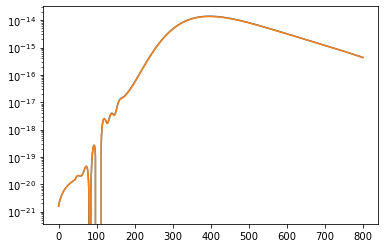

In [44]:
wmax=800
nw=1000
#wi=80
wi=np.linspace(0, wmax, nw)

dip = np.zeros(nw)
newdip = np.zeros(nw)
for i in range(nw):
    dip[i] += dsig_compute_ys(0, wi[i], 1000.0, 0.5)[0][0]
    newdip[i] += dsig_compute_ys(1, wi[i], 1000.0, 0.5)[0][0]
#print(wi[0])
#print(dsig_compute_ys(0, wi, 1000.0, 0.5)[0][0])
#print(dsig_compute_ys(1, wi, 1000.0, 0.5)[0][0])
#print(dsig_compute_ys(2, wi, 1000.0, 0.5)[0][0])

print(' ')
#print(dsig_compute_ys(0, wi, 1000.0, 0.5)[5])
#print(dsig_compute_ys(0, wi, 1000.0, 0.5)[4])

plt.plot(wi, dip)
plt.plot(wi, newdip)
plt.yscale('log')

In [45]:
wmax=2000
nw=1000
w=np.linspace(0, wmax, nw)

In [46]:
def get_dsig_arrays(E, theta):
    theta=theta*np.pi/180.
    dsig_nu_1b=np.zeros((nw,3,2))
    dsig_nu_12b=np.zeros((nw,3,2))
    dsig_nubar_1b=np.zeros((nw,3,2))
    dsig_nubar_12b=np.zeros((nw,3,2))
    big_Q_array=np.zeros(nw)
    little_q_array=np.zeros(nw)
    w=np.linspace(0, E-ml, nw)
    for j in range(2):
        for i in range (nw):
            dsig_nu_1b[i,:,j], dsig_nubar_1b[i,:,j], dsig_nu_12b[i,:,j], dsig_nubar_12b[i,:,j], big_Q_array[i], little_q_array[i]  = dsig_compute_ys(j,w[i],E,np.cos(theta))
        
    dsig_nu_1b_dip = dsig_nu_1b[:,0,0]
    dsig_nu_1b_dip_min = dsig_nu_1b[:,1,0]
    dsig_nu_1b_dip_max = dsig_nu_1b[:,2,0]
    dsig_nubar_1b_dip = dsig_nubar_1b[:,0,0]
    dsig_nubar_1b_dip_min = dsig_nubar_1b[:,1,0]
    dsig_nubar_1b_dip_max = dsig_nubar_1b[:,2,0]
    dsig_nu_12b_dip = dsig_nu_12b[:,0,0]
    dsig_nu_12b_dip_min = dsig_nu_12b[:,1,0]
    dsig_nu_12b_dip_max = dsig_nu_12b[:,2,0]
    dsig_nubar_12b_dip = dsig_nubar_12b[:,0,0]
    dsig_nubar_12b_dip_min = dsig_nubar_12b[:,1,0]
    dsig_nubar_12b_dip_max = dsig_nubar_12b[:,2,0]
    
    dsig_nu_1b_zexp = dsig_nu_1b[:,0,1]
    dsig_nu_1b_zexp_min = dsig_nu_1b[:,1,1]
    dsig_nu_1b_zexp_max = dsig_nu_1b[:,2,1]
    dsig_nubar_1b_zexp = dsig_nubar_1b[:,0,1]
    dsig_nubar_1b_zexp_min = dsig_nubar_1b[:,1,1]
    dsig_nubar_1b_zexp_max = dsig_nubar_1b[:,2,1]
    dsig_nu_12b_zexp = dsig_nu_12b[:,0,1]
    dsig_nu_12b_zexp_min = dsig_nu_12b[:,1,1]
    dsig_nu_12b_zexp_max = dsig_nu_12b[:,2,1]
    dsig_nubar_12b_zexp = dsig_nubar_12b[:,0,1]
    dsig_nubar_12b_zexp_min = dsig_nubar_12b[:,1,1]
    dsig_nubar_12b_zexp_max = dsig_nubar_12b[:,2,1]
    
    dsig_dip = np.array([dsig_nu_1b_dip, dsig_nu_1b_dip_min, dsig_nu_1b_dip_max, 
                         dsig_nubar_1b_dip, dsig_nubar_1b_dip_min, dsig_nubar_1b_dip_max, 
                         dsig_nu_12b_dip, dsig_nu_12b_dip_min, dsig_nu_12b_dip_max, 
                         dsig_nubar_12b_dip, dsig_nubar_12b_dip_min, dsig_nubar_12b_dip_max])
    dsig_zexp = np.array([dsig_nu_1b_zexp, dsig_nu_1b_zexp_min, dsig_nu_1b_zexp_max, 
                          dsig_nubar_1b_zexp, dsig_nubar_1b_zexp_min, dsig_nubar_1b_zexp_max, 
                          dsig_nu_12b_zexp, dsig_nu_12b_zexp_min, dsig_nu_12b_zexp_max, 
                          dsig_nubar_12b_zexp, dsig_nubar_12b_zexp_min, dsig_nubar_12b_zexp_max])
    return w, dsig_dip, dsig_zexp, big_Q_array, little_q_array

In [47]:
#1/0

# Now that we have plots of the cross sections, we can start comparing with experimental data

In [48]:
fname_nu = 'flux_nu.dat'
fname_nubar = 'flux_nubar.dat'
data_nu = np.loadtxt(fname_nu, unpack=True, skiprows=9)
data_nubar = np.loadtxt(fname_nubar, unpack=True, skiprows=9)
nbin= len(data_nu[1,:])

# Setup fine grid
nflux_MB=800
E_flux_min_MB=0
E_flux_max_MB=4#max(data_nu[1,:])
E_flux_MB=np.linspace(E_flux_min_MB, E_flux_max_MB, nflux_MB)
E_flux_MB=E_flux_MB*1000
dE_flux_MB=E_flux_MB[1]-E_flux_MB[0]
nu_flux_MB=np.zeros(nflux_MB)
nubar_flux_MB=np.zeros(nflux_MB)

# Interpolate flux on fine grid
E_flux_read=np.zeros(nbin)
nu_flux_read=np.zeros(nbin)
nubar_flux_read=np.zeros(nbin)
E_flux_read[:]=(data_nu[0,:]+data_nu[1,:])/2*1000
nu_flux_read[:]=data_nu[2,:]
nubar_flux_read[:]=data_nubar[3,:]
nu_flux_MB_interpolate=interpolate.UnivariateSpline(E_flux_read, nu_flux_read, s=0)
nubar_flux_MB_interpolate=interpolate.UnivariateSpline(E_flux_read, nubar_flux_read, s=0)
for i in range(nflux_MB):
    nu_flux_MB[i] = nu_flux_MB_interpolate(E_flux_MB[i])
    nubar_flux_MB[i] = nubar_flux_MB_interpolate(E_flux_MB[i])
norm_nu_MB=np.trapz(nu_flux_MB,E_flux_MB)
norm_nubar_MB=np.trapz(nubar_flux_MB,E_flux_MB)
E_flux_MB=E_flux_MB
nu_flux_MB=nu_flux_MB/norm_nu_MB
nubar_flux_MB=nubar_flux_MB/norm_nubar_MB

def mpgrid(start,stop,nstep):
    dx=(stop-start)/nstep
    grid=np.zeros(nstep)
    for i in range(nstep):
        grid[i]=start+(i+0.5)*dx
    return  grid

In [49]:
fname='MB/exp_nu_MB_095.dat'
Tmu_nu_data_095,dsig_CC_nu_data_095,dsig_CC_nu_err_095=np.loadtxt(fname,unpack=True)
fname='MB/exp_nubar_MB_095.dat'
Tmu_nubar_data_095,dsig_CC_nubar_data_095,dsig_CC_nubar_err_095=np.loadtxt(fname,unpack=True)

In [50]:
n_Tmu=100
Tmu_max=2000
Tmu_min=10
Tmu=np.linspace(Tmu_min, Tmu_max, n_Tmu)
ntheta=10
cos_theta_flux=mpgrid(0.9, 1.0, ntheta)

dsig_nu_flux_1b_dip = np.zeros((n_Tmu,3,3))
dsig_nubar_flux_1b_dip = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_dip = np.zeros((n_Tmu,3,3))
dsig_nubar_flux_12b_dip = np.zeros((n_Tmu,3,3))

dsig_nu_1b_dip = np.zeros(3)
dsig_nubar_1b_dip = np.zeros(3)
dsig_nu_12b_dip = np.zeros(3)
dsig_nubar_12b_dip = np.zeros(3)

dsig_nu_flux_1b_zexp = np.zeros((n_Tmu,3,3))
dsig_nubar_flux_1b_zexp = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_zexp = np.zeros((n_Tmu,3,3))
dsig_nubar_flux_12b_zexp = np.zeros((n_Tmu,3,3))

dsig_nu_1b_zexp = np.zeros(3)
dsig_nubar_1b_zexp = np.zeros(3)
dsig_nu_12b_zexp = np.zeros(3)
dsig_nubar_12b_zexp = np.zeros(3)

dsig_nu_flux_1b_dipq_new = np.zeros((n_Tmu,3,3))
dsig_nubar_flux_1b_dipq_new = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_dipq_new = np.zeros((n_Tmu,3,3))
dsig_nubar_flux_12b_dipq_new = np.zeros((n_Tmu,3,3))

dsig_nu_1b_dipq_new = np.zeros(3)
dsig_nubar_1b_dipq_new = np.zeros(3)
dsig_nu_12b_dipq_new = np.zeros(3)
dsig_nubar_12b_dipq_new = np.zeros(3)

big_Q_array=np.zeros(n_Tmu)
little_q_array=np.zeros(n_Tmu)

for i in range (n_Tmu):
    print(i)
    for j in range (nflux_MB):
        E = E_flux_MB[j]
        w_i= E - Tmu[i] - ml
        if w_i > 0 and E > 0: 
            for k in range (ntheta):
                dsig_nu_1b_dip, dsig_nubar_1b_dip, dsig_nu_12b_dip, dsig_nubar_12b_dip, big_Q_array[i], little_q_array[i] = dsig_compute_ys(0,w_i,E,cos_theta_flux[k])
                dsig_nu_flux_1b_dip[i,:,0] = dsig_nu_flux_1b_dip[i,:,0] +  dsig_nu_1b_dip[:] * nu_flux_MB[j] * dE_flux_MB
                dsig_nu_flux_12b_dip[i,:,0] = dsig_nu_flux_12b_dip[i,:,0] +  dsig_nu_12b_dip[:] * nu_flux_MB[j] * dE_flux_MB
                dsig_nubar_flux_1b_dip[i,:,0] = dsig_nubar_flux_1b_dip[i,:,0] +  dsig_nubar_1b_dip[:] * nubar_flux_MB[j] * dE_flux_MB
                dsig_nubar_flux_12b_dip[i,:,0] = dsig_nubar_flux_12b_dip[i,:,0] +  dsig_nubar_12b_dip[:] * nubar_flux_MB[j] * dE_flux_MB
                
                dsig_nu_1b_dipq_new, dsig_nubar_1b_dipq_new, dsig_nu_12b_dipq_new, dsig_nubar_12b_dipq_new, big_Q_array[i], little_q_array[i] = dsig_compute_ys(1,w_i,E,cos_theta_flux[k])
                dsig_nu_flux_1b_dipq_new[i,:,0] = dsig_nu_flux_1b_dipq_new[i,:,0] +  dsig_nu_1b_dipq_new[:] * nu_flux_MB[j] * dE_flux_MB
                dsig_nu_flux_12b_dipq_new[i,:,0] = dsig_nu_flux_12b_dipq_new[i,:,0] +  dsig_nu_12b_dipq_new[:] * nu_flux_MB[j] * dE_flux_MB
                dsig_nubar_flux_1b_dipq_new[i,:,0] = dsig_nubar_flux_1b_dipq_new[i,:,0] +  dsig_nubar_1b_dipq_new[:] * nubar_flux_MB[j] * dE_flux_MB
                dsig_nubar_flux_12b_dipq_new[i,:,0] = dsig_nubar_flux_12b_dipq_new[i,:,0] +  dsig_nubar_12b_dipq_new[:] * nubar_flux_MB[j] * dE_flux_MB
                
                dsig_nu_1b_zexp, dsig_nubar_1b_zexp, dsig_nu_12b_zexp, dsig_nubar_12b_zexp, big_Q_array[i], little_q_array[i] = dsig_compute_ys(2,w_i,E,cos_theta_flux[k])
                dsig_nu_flux_1b_zexp[i,:,0] = dsig_nu_flux_1b_zexp[i,:,0] +  dsig_nu_1b_zexp[:] * nu_flux_MB[j] * dE_flux_MB
                dsig_nu_flux_12b_zexp[i,:,0] = dsig_nu_flux_12b_zexp[i,:,0] +  dsig_nu_12b_zexp[:] * nu_flux_MB[j] * dE_flux_MB
                dsig_nubar_flux_1b_zexp[i,:,0] = dsig_nubar_flux_1b_zexp[i,:,0] +  dsig_nubar_1b_zexp[:] * nubar_flux_MB[j] * dE_flux_MB
                dsig_nubar_flux_12b_zexp[i,:,0] = dsig_nubar_flux_12b_zexp[i,:,0] +  dsig_nubar_12b_zexp[:] * nubar_flux_MB[j] * dE_flux_MB
                
                if E < 800:
                    dsig_nu_flux_1b_dip[i,:,2] = dsig_nu_flux_1b_dip[i,:,2] +  dsig_nu_1b_dip[:] * nu_flux_MB[j] * dE_flux_MB
                    dsig_nu_flux_12b_dip[i,:,2] = dsig_nu_flux_12b_dip[i,:,2] +  dsig_nu_12b_dip[:] * nu_flux_MB[j] * dE_flux_MB
                    dsig_nubar_flux_1b_dip[i,:,2] = dsig_nubar_flux_1b_dip[i,:,2] +  dsig_nubar_1b_dip[:] * nubar_flux_MB[j] * dE_flux_MB
                    dsig_nubar_flux_12b_dip[i,:,2] = dsig_nubar_flux_12b_dip[i,:,2] +  dsig_nubar_12b_dip[:] * nubar_flux_MB[j] * dE_flux_MB
                    dsig_nu_flux_1b_dipq_new[i,:,2] = dsig_nu_flux_1b_dipq_new[i,:,2] +  dsig_nu_1b_dipq_new[:] * nu_flux_MB[j] * dE_flux_MB
                    dsig_nu_flux_12b_dipq_new[i,:,2] = dsig_nu_flux_12b_dipq_new[i,:,2] +  dsig_nu_12b_dipq_new[:] * nu_flux_MB[j] * dE_flux_MB
                    dsig_nubar_flux_1b_dipq_new[i,:,2] = dsig_nubar_flux_1b_dipq_new[i,:,2] +  dsig_nubar_1b_dipq_new[:] * nubar_flux_MB[j] * dE_flux_MB
                    dsig_nubar_flux_12b_dipq_new[i,:,2] = dsig_nubar_flux_12b_dipq_new[i,:,2] +  dsig_nubar_12b_dipq_new[:] * nubar_flux_MB[j] * dE_flux_MB
                    dsig_nu_flux_1b_zexp[i,:,2] = dsig_nu_flux_1b_zexp[i,:,2] +  dsig_nu_1b_zexp[:] * nu_flux_MB[j] * dE_flux_MB
                    dsig_nu_flux_12b_zexp[i,:,2] = dsig_nu_flux_12b_zexp[i,:,2] +  dsig_nu_12b_zexp[:] * nu_flux_MB[j] * dE_flux_MB
                    dsig_nubar_flux_1b_zexp[i,:,2] = dsig_nubar_flux_1b_zexp[i,:,2] +  dsig_nubar_1b_zexp[:] * nubar_flux_MB[j] * dE_flux_MB
                    dsig_nubar_flux_12b_zexp[i,:,2] = dsig_nubar_flux_12b_zexp[i,:,2] +  dsig_nubar_12b_zexp[:] * nubar_flux_MB[j] * dE_flux_MB

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [51]:
#print(cos_theta_flux)
#print(little_q_array)

In [52]:
dsig_nu_flux_1b_MB_095_dip = dsig_nu_flux_1b_dip / ntheta * 10**(-26)/6
dsig_nubar_flux_1b_MB_095_dip = dsig_nubar_flux_1b_dip / ntheta * 10**(-26)/6
dsig_nu_flux_12b_MB_095_dip = dsig_nu_flux_12b_dip / ntheta * 10**(-26)/6
dsig_nubar_flux_12b_MB_095_dip = dsig_nubar_flux_12b_dip / ntheta * 10**(-26)/6

dsig_nu_flux_1b_MB_095_dipq_new = dsig_nu_flux_1b_dipq_new / ntheta * 10**(-26)/6
dsig_nubar_flux_1b_MB_095_dipq_new = dsig_nubar_flux_1b_dipq_new / ntheta * 10**(-26)/6
dsig_nu_flux_12b_MB_095_dipq_new = dsig_nu_flux_12b_dipq_new / ntheta * 10**(-26)/6
dsig_nubar_flux_12b_MB_095_dipq_new = dsig_nubar_flux_12b_dipq_new / ntheta * 10**(-26)/6

dsig_nu_flux_1b_MB_095_zexp = dsig_nu_flux_1b_zexp / ntheta * 10**(-26)/6
dsig_nubar_flux_1b_MB_095_zexp = dsig_nubar_flux_1b_zexp / ntheta * 10**(-26)/6
dsig_nu_flux_12b_MB_095_zexp = dsig_nu_flux_12b_zexp / ntheta * 10**(-26)/6
dsig_nubar_flux_12b_MB_095_zexp = dsig_nubar_flux_12b_zexp / ntheta * 10**(-26)/6

little_q_MB_095 = little_q_array
big_Q_MB_095 = big_Q_array

Tmu_MB_095 = Tmu

In [53]:
'''
#figure(num=None, figsize=(5, 4), dpi=120, facecolor='w', edgecolor='k')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# plotting the data for nu
ax1.errorbar(Tmu_nu_data_095, dsig_CC_nu_data_095, yerr=dsig_CC_nu_err_095, fmt="none", ecolor='red')
ax1.plot(Tmu_nu_data_095, dsig_CC_nu_data_095,'ro')
# plotting dipole for nu
ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dip[:,0,0], 'red', label='1b (dip)')
ax1.fill_between(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dip[:,1,0], dsig_nu_flux_1b_MB_095_dip[:,2,0], alpha=0.25,color='red')
ax1.plot(Tmu_MB_095, dsig_nu_flux_12b_MB_095_dip[:,0,0], 'black', label='12b (dip)')
ax1.fill_between(Tmu_MB_095, dsig_nu_flux_12b_MB_095_dip[:,1,0], dsig_nu_flux_12b_MB_095_dip[:,2,0], alpha=0.25,color='black')
# plotting z-expansion for nu
ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_zexp[:,0,0], 'blue', label='1b (zexp)')
ax1.fill_between(Tmu_MB_095, dsig_nu_flux_1b_MB_095_zexp[:,1,0], dsig_nu_flux_1b_MB_095_zexp[:,2,0], alpha=0.25,color='blue')
ax1.plot(Tmu_MB_095, dsig_nu_flux_12b_MB_095_zexp[:,0,0], 'green', label='12b (zexp)')
ax1.fill_between(Tmu_MB_095, dsig_nu_flux_12b_MB_095_zexp[:,1,0], dsig_nu_flux_12b_MB_095_zexp[:,2,0], alpha=0.25,color='green')

# plotting the data for nubar
ax2.errorbar(Tmu_nubar_data_095, dsig_CC_nubar_data_095, yerr=dsig_CC_nubar_err_095, fmt="none", ecolor='red')
ax2.plot(Tmu_nubar_data_095, dsig_CC_nubar_data_095,'ro')
# plotting dipole for nubar
ax2.plot(Tmu_MB_095, dsig_nubar_flux_1b_MB_095_dip[:,0,0], 'red', label='1b (dip)')
ax2.fill_between(Tmu_MB_095, dsig_nubar_flux_1b_MB_095_dip[:,1,0], dsig_nubar_flux_1b_MB_095_dip[:,2,0], alpha=0.25,color='red')
ax2.plot(Tmu_MB_095, dsig_nubar_flux_12b_MB_095_dip[:,0,0], 'black', label='12b (dip)')
ax2.fill_between(Tmu_MB_095, dsig_nubar_flux_12b_MB_095_dip[:,1,0], dsig_nubar_flux_12b_MB_095_dip[:,2,0], alpha=0.25,color='black')
# plotting z-expansion for nubar
ax2.plot(Tmu_MB_095, dsig_nubar_flux_1b_MB_095_zexp[:,0,0], 'blue', label='1b (zexp)')
ax2.fill_between(Tmu_MB_095, dsig_nubar_flux_1b_MB_095_zexp[:,1,0], dsig_nubar_flux_1b_MB_095_zexp[:,2,0], alpha=0.25,color='blue')
ax2.plot(Tmu_MB_095, dsig_nubar_flux_12b_MB_095_zexp[:,0,0], 'green', label='12b (zexp)')
ax2.fill_between(Tmu_MB_095, dsig_nubar_flux_12b_MB_095_zexp[:,1,0], dsig_nubar_flux_12b_MB_095_zexp[:,2,0], alpha=0.25,color='green')

# plotting q and Q vs omega
ax3.plot(Tmu_MB_095, big_Q_MB_095, label='Q')
ax3.plot(Tmu_MB_095, little_q_MB_095, label='q')

ax1.set_xlim(0, 2000)
ax1.legend(loc=1, ncol=1, bbox_to_anchor=(0.9, 1.0))
ax1.set_title(r'$\nu - ^{12}$C   $0.9<\cos(\theta)<1.0$')
ax1.set_xlabel(r'$T_\mu$')
ax2.set_xlim(0, 2000)
ax2.legend(loc=1, ncol=1)
ax2.set_title(r'$\bar{\nu} - ^{12}$C   $0.9<\cos(\theta)<1.0$')
ax2.set_xlabel(r'$T_\mu$')
ax1.set_ylabel(r'$\frac{d\sigma}{dT_\mu d\cos(\theta_\mu)}$ cm$^2$ MeV$^{-1}$')
ax3.set_xlim(0, 2000)
ax3.set_xlabel(r'$T_\mu$')
ax3.legend(loc=0, ncol=1)
#ax2.yaxis.tick_right()
ax3.yaxis.tick_right()

fig.show()
'''

'\n#figure(num=None, figsize=(5, 4), dpi=120, facecolor=\'w\', edgecolor=\'k\')\nfig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))\nplt.tight_layout(pad=1.5)\nfig.subplots_adjust(wspace=0)\n\n# plotting the data for nu\nax1.errorbar(Tmu_nu_data_095, dsig_CC_nu_data_095, yerr=dsig_CC_nu_err_095, fmt="none", ecolor=\'red\')\nax1.plot(Tmu_nu_data_095, dsig_CC_nu_data_095,\'ro\')\n# plotting dipole for nu\nax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dip[:,0,0], \'red\', label=\'1b (dip)\')\nax1.fill_between(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dip[:,1,0], dsig_nu_flux_1b_MB_095_dip[:,2,0], alpha=0.25,color=\'red\')\nax1.plot(Tmu_MB_095, dsig_nu_flux_12b_MB_095_dip[:,0,0], \'black\', label=\'12b (dip)\')\nax1.fill_between(Tmu_MB_095, dsig_nu_flux_12b_MB_095_dip[:,1,0], dsig_nu_flux_12b_MB_095_dip[:,2,0], alpha=0.25,color=\'black\')\n# plotting z-expansion for nu\nax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_zexp[:,0,0], \'blue\', label=\'1b (zexp)\')\nax1.fill_between(Tmu_MB_095, dsig

Text(45.0, 0.5, '$\\frac{d\\sigma}{dT_\\mu d\\cos(\\theta_\\mu)}$ cm$^2$ MeV$^{-1}$')

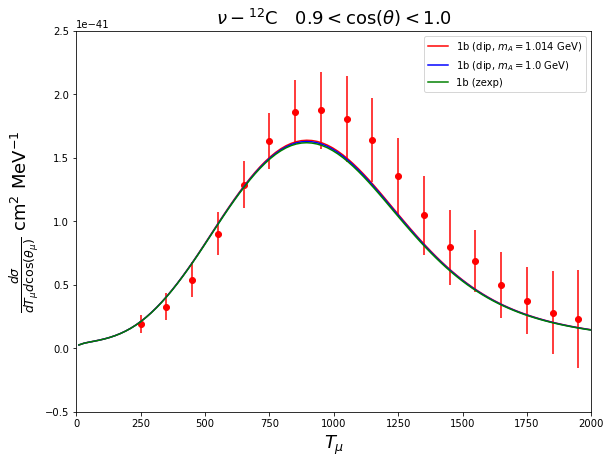

In [54]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# plotting the data for nu
ax1.errorbar(Tmu_nu_data_095, dsig_CC_nu_data_095, yerr=dsig_CC_nu_err_095, fmt="none", ecolor='red')
ax1.plot(Tmu_nu_data_095, dsig_CC_nu_data_095,'ro')
# plotting dipole for nu
ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dip[:,0,0], 'red', label='1b (dip, $m_A=1.014$ GeV)')
#ax1.fill_between(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dip[:,1,0], dsig_nu_flux_1b_MB_095_dip[:,2,0], alpha=0.25,color='red')
#ax1.plot(Tmu_MB_095, dsig_nu_flux_12b_MB_095_dip[:,0,0], 'black', label='12b (dip, $m_A=1.014$ GeV)')
#ax1.fill_between(Tmu_MB_095, dsig_nu_flux_12b_MB_095_dip[:,1,0], dsig_nu_flux_12b_MB_095_dip[:,2,0], alpha=0.25,color='black')
# plotting new dipole for nu
ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dipq_new[:,0,0], 'blue', label=r'1b (dip, $m_A=1.0$ GeV)')
#ax1.fill_between(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dipq_new[:,1,0], dsig_nu_flux_1b_MB_095_dipq_new[:,2,0], alpha=0.25,color='blue')
#ax1.plot(Tmu_MB_095, dsig_nu_flux_12b_MB_095_dipq_new[:,0,0], 'green', label=r'12b (dip, $m_A=1.0$ GeV)')
#ax1.fill_between(Tmu_MB_095, dsig_nu_flux_12b_MB_095_dipq_new[:,1,0], dsig_nu_flux_12b_MB_095_dipq_new[:,2,0], alpha=0.25,color='green')
# plotting z-expansion for nu
ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_zexp[:,0,0], 'green', label='1b (zexp)')
#ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_zexp[:,0,0], 'red', label='1b (zexp)')
#ax1.fill_between(Tmu_MB_095, dsig_nu_flux_1b_MB_095_zexp[:,1,0], dsig_nu_flux_1b_MB_095_zexp[:,2,0], alpha=0.25,color='blue')
#ax1.plot(Tmu_MB_095, dsig_nu_flux_12b_MB_095_zexp[:,0,0], 'purple', label='12b (zexp)')
#ax1.plot(Tmu_MB_095, dsig_nu_flux_12b_MB_095_zexp[:,0,0], 'black', label='12b (zexp)')
#ax1.fill_between(Tmu_MB_095, dsig_nu_flux_12b_MB_095_zexp[:,1,0], dsig_nu_flux_12b_MB_095_zexp[:,2,0], alpha=0.25,color='green')

ax1.set_xlim(0, 2000)
ax1.set_ylim(-0.5e-41, 2.5e-41)
ax1.legend(loc=0, ncol=1, bbox_to_anchor=(1.0, 1.0))
ax1.set_title(r'$\nu - ^{12}$C   $0.9<\cos(\theta)<1.0$', fontsize=18)
ax1.set_xlabel(r'$T_\mu$', fontsize=18)
ax1.set_ylabel(r'$\frac{d\sigma}{dT_\mu d\cos(\theta_\mu)}$ cm$^2$ MeV$^{-1}$', fontsize=18)

#fig.savefig('Miniboone_testing_mA_choices_testingtesting_all3_withouterror.png', bbox_inches='tight')
#fig.savefig('aaron_z_parameters_cross_section_both_1014.png', bbox_inches='tight')
#fig.show()

Text(45.0, 0.5, '$\\frac{d\\sigma}{dT_\\mu d\\cos(\\theta_\\mu)}$ Ratio')

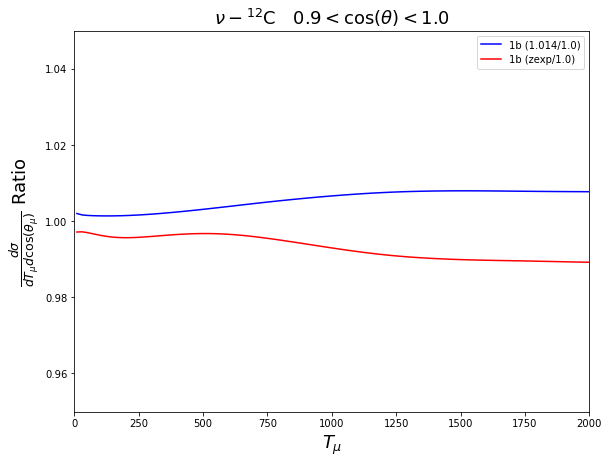

In [55]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
plt.tight_layout(pad=1.5)
fig.subplots_adjust(wspace=0)

# comparing mA=1.014 with mA=1.0
#ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dipq_new[:,0,0]/dsig_nu_flux_1b_MB_095_dip[:,0,0], 'blue', label='1b (1.0/1.014)')
ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dip[:,0,0]/dsig_nu_flux_1b_MB_095_dipq_new[:,0,0], 'blue', label='1b (1.014/1.0)')

# comparing zexp with mA=1.0
#ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_dipq_new[:,0,0]/dsig_nu_flux_1b_MB_095_zexp[:,0,0], 'red', label='1b (1.0/zexp)')
ax1.plot(Tmu_MB_095, dsig_nu_flux_1b_MB_095_zexp[:,0,0]/dsig_nu_flux_1b_MB_095_dipq_new[:,0,0], 'red', label='1b (zexp/1.0)')

ax1.set_xlim(0, 2000)
ax1.set_ylim(0.95, 1.05)
ax1.legend(loc=0)
ax1.set_title(r'$\nu - ^{12}$C   $0.9<\cos(\theta)<1.0$', fontsize=18)
ax1.set_xlabel(r'$T_\mu$', fontsize=18)
ax1.set_ylabel(r'$\frac{d\sigma}{dT_\mu d\cos(\theta_\mu)}$ Ratio', fontsize=18)

#fig.savefig('Miniboone_testing_mA_choices_cross_section_ratios_dipsquared.png', bbox_inches='tight')
#fig.savefig('cross_section_ratio_both_10.png', bbox_inches='tight')
#fig.show()

In [56]:
# mA = 1.014
dsig_nu_flux_1b_MB_095_dip[:,0,0][:10]

array([2.50145717e-43, 3.86875504e-43, 4.72363370e-43, 5.50390432e-43,
       6.34605106e-43, 7.31905677e-43, 8.47304461e-43, 9.85090463e-43,
       1.14849491e-42, 1.34014879e-42])

In [57]:
# mA = 1.0
dsig_nu_flux_1b_MB_095_dipq_new[:,0,0][:10]

array([2.49650180e-43, 3.86248132e-43, 4.71659562e-43, 5.49607813e-43,
       6.33727180e-43, 7.30907367e-43, 8.46152319e-43, 9.83741483e-43,
       1.14689540e-42, 1.33823347e-42])

In [58]:
# zexp
dsig_nu_flux_1b_MB_095_zexp[:,0,0][:10]

array([2.48935100e-43, 3.85161156e-43, 4.70234538e-43, 5.47793915e-43,
       6.31453744e-43, 7.28096759e-43, 8.42720478e-43, 9.79598680e-43,
       1.14195268e-42, 1.33240637e-42])

In [59]:
#Tmu_MB_095

In [60]:
dsig_nu_flux_1b_MB_095_dip[:,0,0]/dsig_nu_flux_1b_MB_095_dipq_new[:,0,0]

array([1.00198493, 1.00162427, 1.00149219, 1.00142396, 1.00138534,
       1.00136585, 1.00136163, 1.00137127, 1.00139464, 1.00143123,
       1.00148063, 1.00154138, 1.00161277, 1.00169402, 1.00178442,
       1.00188333, 1.00198967, 1.00210281, 1.00222181, 1.00234607,
       1.00247539, 1.00260939, 1.00274777, 1.0028898 , 1.00303482,
       1.00318237, 1.00333228, 1.0034842 , 1.00363772, 1.00379248,
       1.0039482 , 1.00410432, 1.00426042, 1.00441593, 1.00457031,
       1.00472292, 1.00487361, 1.00502206, 1.00516784, 1.00531092,
       1.00545102, 1.00558828, 1.0057229 , 1.0058547 , 1.00598364,
       1.0061094 , 1.00623178, 1.0063505 , 1.006466  , 1.00657799,
       1.00668664, 1.00679181, 1.00689339, 1.00699112, 1.00708463,
       1.00717347, 1.00725757, 1.00733682, 1.00741106, 1.00748026,
       1.00754598, 1.00760476, 1.00765799, 1.00770593, 1.0077487 ,
       1.00778664, 1.00781977, 1.00784884, 1.00787367, 1.00789461,
       1.00791208, 1.00792614, 1.00793687, 1.00794411, 1.00794

# next i want to investigate *only* the response functions

In [61]:
# adjusting the original dsig_compute function to calculate the response functions instead

# dip_or_z = 0 is dipole
# dip_or_z = 1 is new dipole
# dip_or_z = 2 is z-expansion
# because Rij_int_yq_1(2)b[0] is dipole
# and Rij_int_yq_1(2)b[1] is new dipole
# and Rij_int_yq_1(2)b[2] is z-expansion
def response_functions_compute_ys(dip_or_z, wi, E, cos):
    Ep=E-wi
    W=E+Ep
    k=E
    kp=np.sqrt(Ep**2-ml**2)
    Q=np.sqrt(k**2+kp**2+2*k*kp*cos)
    q=np.sqrt(k**2+kp**2-2*k*kp*cos)
    #print(q)
    kz=(ml**2-wi**2+q**2+2*E*wi)/2/q
    kx=np.sqrt(E**2-kz**2)
    Qz=2*kz-q
    Qx=2*kx
    L_CC=W**2-q**2-ml**2
    L_CL=(-W*Qz+wi*q)
    L_LL=Qz**2-wi**2+ml**2
    L_T=Qx**2/2.-(wi**2-q**2)+ml**2
    L_Tp=W*q-wi*Qz 
    sig_CC=G**2/4./np.pi**2*kp/2./E
    N_CC=sig_CC*L_CC
    N_CL=sig_CC*L_CL
    N_LL=sig_CC*L_LL
    N_T=sig_CC*L_T
    N_Tp=sig_CC*L_Tp
    yi=y_int_nr(wi,q)
    R00_1b_i=R00_int_yq_1b[dip_or_z](yi,q)
    R00_1b_i_err=np.abs(R00_int_max_yq_1b[dip_or_z](yi,q)-R00_int_min_yq_1b[dip_or_z](yi,q)) 
    R0z_1b_i=R0z_int_yq_1b[dip_or_z](yi,q)
    R0z_1b_i_err=np.abs(R0z_int_max_yq_1b[dip_or_z](yi,q)-R0z_int_min_yq_1b[dip_or_z](yi,q))
    Rzz_1b_i=Rzz_int_yq_1b[dip_or_z](yi,q)
    Rzz_1b_i_err=np.abs(Rzz_int_max_yq_1b[dip_or_z](yi,q)-Rzz_int_min_yq_1b[dip_or_z](yi,q))
    Rxx_1b_i=Rxx_int_yq_1b[dip_or_z](yi,q)
    Rxx_1b_i_err=np.abs(Rxx_int_max_yq_1b[dip_or_z](yi,q)-Rxx_int_min_yq_1b[dip_or_z](yi,q))
    Rxy_1b_i=Rxy_int_yq_1b[dip_or_z](yi,q)
    Rxy_1b_i_err=np.abs(Rxy_int_max_yq_1b[dip_or_z](yi,q)-Rxy_int_min_yq_1b[dip_or_z](yi,q))
    R00_12b_i=R00_int_yq_12b[dip_or_z](yi,q)
    R00_12b_i_err=np.abs(R00_int_max_yq_12b[dip_or_z](yi,q)-R00_int_min_yq_12b[dip_or_z](yi,q)) 
    R0z_12b_i=R0z_int_yq_12b[dip_or_z](yi,q)
    R0z_12b_i_err=np.abs(R0z_int_max_yq_12b[dip_or_z](yi,q)-R0z_int_min_yq_12b[dip_or_z](yi,q))
    Rzz_12b_i=Rzz_int_yq_12b[dip_or_z](yi,q)
    Rzz_12b_i_err=np.abs(Rzz_int_max_yq_12b[dip_or_z](yi,q)-Rzz_int_min_yq_12b[dip_or_z](yi,q))
    Rxx_12b_i=Rxx_int_yq_12b[dip_or_z](yi,q)
    Rxx_12b_i_err=np.abs(Rxx_int_max_yq_12b[dip_or_z](yi,q)-Rxx_int_min_yq_12b[dip_or_z](yi,q))
    Rxy_12b_i=Rxy_int_yq_12b[dip_or_z](yi,q)
    Rxy_12b_i_err=np.abs(Rxy_int_max_yq_12b[dip_or_z](yi,q)-Rxy_int_min_yq_12b[dip_or_z](yi,q))

    array_of_1bs = np.array([R00_1b_i, R0z_1b_i, Rzz_1b_i, Rxx_1b_i, Rxy_1b_i])
    array_of_12bs = np.array([R00_12b_i, R0z_12b_i, Rzz_12b_i, Rxx_12b_i, Rxy_12b_i])
    return array_of_1bs, array_of_12bs

In [85]:
wmax=850
nw=1000
wi=np.linspace(0, wmax, nw)

# choosing the energy and angle
theenergy = 1000.0
thetheta = 60 * np.pi/180
#print(np.cos(thetheta))

response_dip = np.zeros((5,nw))
response_newdip = np.zeros((5,nw))
response_zexp = np.zeros((5,nw))

# j=5 because 00, 0z, zz, xx, xy
for j in range(5):
    for i in range(nw):
        response_dip[j][i] += response_functions_compute_ys(0, wi[i], theenergy, np.cos(thetheta))[0][j]
        response_newdip[j][i] += response_functions_compute_ys(1, wi[i], theenergy, np.cos(thetheta))[0][j]
        response_zexp[j][i] += response_functions_compute_ys(2, wi[i], theenergy, np.cos(thetheta))[0][j]

In [86]:
#response_dip[0]

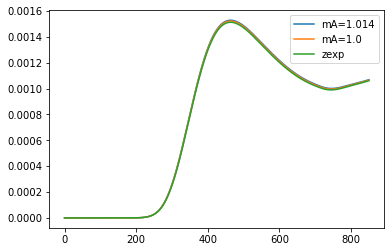

In [87]:
plt.plot(wi, response_dip[0], label='mA=1.014')
plt.plot(wi, response_newdip[0], label='mA=1.0')
plt.plot(wi, response_zexp[0], label='zexp')
plt.legend(loc=0)
plt.show()

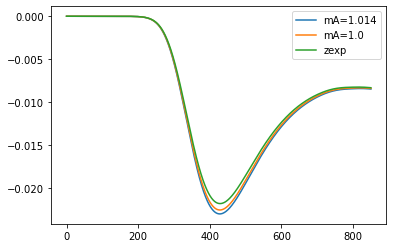

In [88]:
plt.plot(wi, response_dip[4], label='mA=1.014')
plt.plot(wi, response_newdip[4], label='mA=1.0')
plt.plot(wi, response_zexp[4], label='zexp')
plt.legend(loc=0)
plt.show()

# investigating the cross section at fixed kinematics

In [95]:
# defining a simpler dsig function for this new purpose
def dsig_compute_ys(dip_or_z, wi, E, cos):
    Ep=E-wi
    W=E+Ep
    k=E
    kp=np.sqrt(Ep**2-ml**2)
    Q=np.sqrt(k**2+kp**2+2*k*kp*cos)
    q=np.sqrt(k**2+kp**2-2*k*kp*cos)
    # these are the bolded q's from eq. 10
    big_Q = np.sqrt(q**2 - wi**2)
    little_q = q
    #print(q)
    kz=(ml**2-wi**2+q**2+2*E*wi)/2/q
    kx=np.sqrt(E**2-kz**2)
    Qz=2*kz-q
    Qx=2*kx
    L_CC=W**2-q**2-ml**2
    L_CL=(-W*Qz+wi*q)
    L_LL=Qz**2-wi**2+ml**2
    L_T=Qx**2/2.-(wi**2-q**2)+ml**2
    L_Tp=W*q-wi*Qz 
    sig_CC=G**2/4./np.pi**2*kp/2./E
    N_CC=sig_CC*L_CC
    N_CL=sig_CC*L_CL
    N_LL=sig_CC*L_LL
    N_T=sig_CC*L_T
    N_Tp=sig_CC*L_Tp
    yi=y_int_nr(wi,q)
    R00_1b_i=R00_int_yq_1b[dip_or_z](yi,q)
    R00_1b_i_err=np.abs(R00_int_max_yq_1b[dip_or_z](yi,q)-R00_int_min_yq_1b[dip_or_z](yi,q)) 
    R0z_1b_i=R0z_int_yq_1b[dip_or_z](yi,q)
    R0z_1b_i_err=np.abs(R0z_int_max_yq_1b[dip_or_z](yi,q)-R0z_int_min_yq_1b[dip_or_z](yi,q))
    Rzz_1b_i=Rzz_int_yq_1b[dip_or_z](yi,q)
    Rzz_1b_i_err=np.abs(Rzz_int_max_yq_1b[dip_or_z](yi,q)-Rzz_int_min_yq_1b[dip_or_z](yi,q))
    Rxx_1b_i=Rxx_int_yq_1b[dip_or_z](yi,q)
    Rxx_1b_i_err=np.abs(Rxx_int_max_yq_1b[dip_or_z](yi,q)-Rxx_int_min_yq_1b[dip_or_z](yi,q))
    Rxy_1b_i=Rxy_int_yq_1b[dip_or_z](yi,q)
    Rxy_1b_i_err=np.abs(Rxy_int_max_yq_1b[dip_or_z](yi,q)-Rxy_int_min_yq_1b[dip_or_z](yi,q))

    if wi > q:
        print('problem, wi > q',wi, q)
    dsig_nu_1b=np.zeros(3)
    dsig_nubar_1b=np.zeros(3)
    dsig_nu_12b=np.zeros(3)
    dsig_nubar_12b=np.zeros(3)
    if q < 2500:
        dsig_nu=N_CC*R00_1b_i+N_CL*R0z_1b_i+N_LL*Rzz_1b_i+N_T*Rxx_1b_i-N_Tp*Rxy_1b_i
        
        dsig_nu_e=np.sqrt(N_CC**2*R00_1b_i_err**2+N_CL**2*R0z_1b_i_err**2+N_LL**2*Rzz_1b_i_err**2
                   +N_T**2*Rxx_1b_i_err**2+N_Tp**2*Rxy_1b_i_err**2)
        
        dsig_nubar=N_CC*R00_1b_i+N_CL*R0z_1b_i+N_LL*Rzz_1b_i+N_T*Rxx_1b_i+N_Tp*Rxy_1b_i
        
        dsig_nubar_e=dsig_nu_e
        dsig_nu_1b[0]=dsig_nu
        dsig_nu_1b[1]=dsig_nu-dsig_nu_e/2
        dsig_nu_1b[2]=dsig_nu+dsig_nu_e/2
        dsig_nubar_1b[0]=dsig_nubar
        dsig_nubar_1b[1]=dsig_nubar-dsig_nubar_e/2
        dsig_nubar_1b[2]=dsig_nubar+dsig_nubar_e/2 
    return dsig_nu_1b

In [171]:
nw=1000

wmax500=390
wi500=np.linspace(0, wmax500, nw)
wmax700=590
wi700=np.linspace(0, wmax700, nw)
wmax1000=890
wi1000=np.linspace(0, wmax1000, nw)

wi = np.array([wi500, wi700, wi1000])

# choosing the energy and angle
energyoptions = np.array([500, 700, 1000])
thetheta = 60 * np.pi/180
#print(np.cos(thetheta))

crossection_dip = np.zeros((3,nw))
crossection_newdip = np.zeros((3,nw))
crossection_zexp = np.zeros((3,nw))

#print(dsig_compute_ys(0, 100, theenergy, np.cos(thetheta))[0])

for j in range(len(energyoptions)):
    for i in range(nw):
        crossection_dip[j][i] += dsig_compute_ys(0, wi[j][i], energyoptions[j], np.cos(thetheta))[0]
        crossection_newdip[j][i] += dsig_compute_ys(1, wi[j][i], energyoptions[j], np.cos(thetheta))[0]
        crossection_zexp[j][i] += dsig_compute_ys(2, wi[j][i], energyoptions[j], np.cos(thetheta))[0]

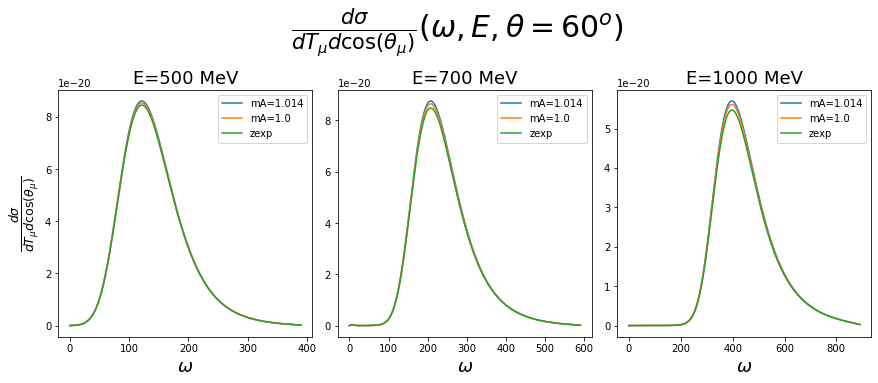

In [174]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 4))
plt.tight_layout(pad=1.0)
fig.subplots_adjust(wspace=0.1)
fig.suptitle(r'$\frac{d\sigma}{dT_\mu d\cos(\theta_\mu)} (\omega, E, \theta=60^o)$', y=1.24, fontsize=30)

ax1.plot(wi[0], crossection_dip[0], label='mA=1.014')
ax1.plot(wi[0], crossection_newdip[0], label='mA=1.0')
ax1.plot(wi[0], crossection_zexp[0], label='zexp')
ax1.set_title('E=500 MeV', fontsize=18)
ax1.set_xlabel(r'$\omega$', fontsize=18)
ax1.set_ylabel(r'$\frac{d\sigma}{dT_\mu d\cos(\theta_\mu)}$', fontsize=18)
ax1.legend(loc=0)

ax2.plot(wi[1], crossection_dip[1], label='mA=1.014')
ax2.plot(wi[1], crossection_newdip[1], label='mA=1.0')
ax2.plot(wi[1], crossection_zexp[1], label='zexp')
ax2.set_title('E=700 MeV', fontsize=18)
ax2.set_xlabel(r'$\omega$', fontsize=18)
ax2.legend(loc=0)

ax3.plot(wi[2], crossection_dip[2], label='mA=1.014')
ax3.plot(wi[2], crossection_newdip[2], label='mA=1.0')
ax3.plot(wi[2], crossection_zexp[2], label='zexp')
ax3.set_title('E=1000 MeV', fontsize=18)
ax3.set_xlabel(r'$\omega$', fontsize=18)
ax3.legend(loc=0)

#fig.savefig('MB_cross_section_comparing_kinematics_theta60.png', bbox_inches='tight')